In [2]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_extraction import FeatureHasher

sns.set_style('white')
np.random.seed(42)
os.environ["PYTHONWARNINGS"] = "ignore::UserWarning"
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=UserWarning)

<font size=10> Data Visualization

In [3]:
train_path = 'input/train.csv'
test_path = 'input/test.csv'

In [4]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [5]:
train_df.T

,0,1,2,3,4,5,6,7,8,9,...,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
carid,1,2,5,6,7,10,12,13,14,18,...,64261,42866,24598,72533,27237,18531,4294,20584,11490,28672
tradeTime,2021/6/28,2021/6/25,2021/6/19,2021/6/29,2021/6/30,2021/6/8,2021/6/16,2021/7/17,2021/7/30,2021/5/30,...,2021/6/19,2020/7/7,2021/7/6,2021/2/4,2021/4/19,2021/5/26,2020/6/3,2020/9/27,2020/11/9,2020/12/7
brand,1,2,5,6,7,2,10,6,8,13,...,18,5,16,23,44,34,12,7,45,55
serial,1,2,5,6,7,10,12,13,14,18,...,536,73,443,77,249,588,92,113,131,229
model,1,2,5,6,7,10,12,13,14,18,...,11277,599,5156,12481,403,4169,1797,501,3024,5838
mileage,4.01,8.6,15.56,6.04,5.7,13.02,7.03,4.64,16.27,5.45,...,3.63,4.54,7.14,6.87,5.79,10.38,11.69,9.87,9.57,3.92
color,1,1,1,1,4,1,5,1,4,1,...,3,1,1,1,2,5,2,6,1,1
cityId,1,2,2,3,1,2,3,3,1,2,...,7,19,1,1,1,35,1,1,1,13
carCode,1.0,1.0,3.0,1.0,2.0,3.0,2.0,1.0,2.0,1.0,...,4.0,1.0,2.0,2.0,1.0,3.0,2.0,2.0,1.0,1.0
transferCount,0,0,0,3,2,1,0,0,0,0,...,0,0,0,1,0,0,2,0,1,0


In [6]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
carid,30000.0,37099.253567,21423.562842,1.00,18622.7500,36951.5000,55728.50,74156.00
brand,30000.0,19.228300,18.009168,1.00,8.0000,13.0000,23.00,133.00
serial,30000.0,237.707733,233.329093,1.00,76.0000,162.0000,312.00,1248.00
model,30000.0,5312.047767,4055.789248,1.00,1171.0000,4920.5000,8976.00,12735.00
mileage,30000.0,7.144473,4.383048,0.01,3.9075,6.5400,9.54,44.74
color,30000.0,2.786700,2.037599,1.00,1.0000,2.0000,5.00,10.00
cityId,30000.0,7.683000,9.294335,1.00,1.0000,4.0000,14.00,93.00
carCode,29991.0,1.612184,0.809380,1.00,1.0000,1.0000,2.00,6.00
transferCount,30000.0,0.510900,0.796347,0.00,0.0000,0.0000,1.00,10.00
seatings,30000.0,5.110000,0.671204,2.00,5.0000,5.0000,5.00,9.00


In [7]:
test_df.T

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
carid,3,4,8,9,11,15,17,19,21,27,...,30403,59448,7270,32748,63256,55510,1768,20723,15625,51844
tradeTime,2021/9/26,2021/8/14,2021/10/9,2021/9/30,2021/8/9,2021/8/30,2021/8/7,2021/9/10,2021/9/10,2021/8/1,...,2021/10/23,2021/10/12,2021/8/3,2021/10/17,2021/11/25,2021/10/28,2021/8/23,2021/9/3,2021/10/29,2021/9/5
brand,3,4,8,9,8,11,12,14,6,17,...,7,59,32,13,11,12,17,7,25,8
serial,3,4,8,9,11,15,17,19,20,24,...,7,475,199,310,63,275,480,166,235,11
model,3,4,8,9,11,15,17,19,21,27,...,1273,10530,521,728,11139,1023,1400,1056,371,9459
mileage,6.64,8.04,10.19,2.27,7.03,12.3,7.27,6.02,5.7,16.99,...,5.92,8.27,3.91,8.51,5.26,8.53,11.11,11.02,6.21,8.5
color,2,3,5,2,2,2,1,1,6,7,...,4,4,4,4,5,1,1,2,4,2
cityId,3,1,1,2,3,3,1,4,3,5,...,1,1,1,1,1,1,19,1,5,1
carCode,1,2,2,4,1,1,1,1,1,2,...,1,2,1,2,1,1,2,2,1,1
transferCount,0,2,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [8]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
carid,5000.0,31595.454800,23440.700176,3.00,9113.0000,30342.50,51952.2500,74146.00
brand,5000.0,19.584600,18.003090,1.00,8.0000,13.00,23.0000,125.00
serial,5000.0,234.703800,230.626072,1.00,68.7500,160.00,312.0000,1247.00
model,5000.0,4621.203600,4047.940514,1.00,844.7500,3503.00,8143.2500,12734.00
mileage,5000.0,7.558546,4.544546,0.01,4.1975,7.03,10.1325,44.51
color,5000.0,2.805000,2.009623,1.00,1.0000,2.00,5.0000,10.00
cityId,5000.0,6.197400,7.621630,1.00,1.0000,2.00,9.0000,58.00
carCode,5000.0,1.729400,0.962684,1.00,1.0000,1.00,2.0000,6.00
transferCount,5000.0,0.443800,0.789535,0.00,0.0000,0.00,1.0000,8.00
seatings,5000.0,5.160600,0.722296,2.00,5.0000,5.00,5.0000,9.00


In [9]:
cols = list(train_df.columns)
cols.remove('carid')
cols.remove('country')
cols.remove('price')

# for feature in cols:
#     sns.displot(train_df[feature])
#     plt.savefig('Train_Data_Visualization/' + feature + '.png')
#     plt.cla()
#     plt.clf()

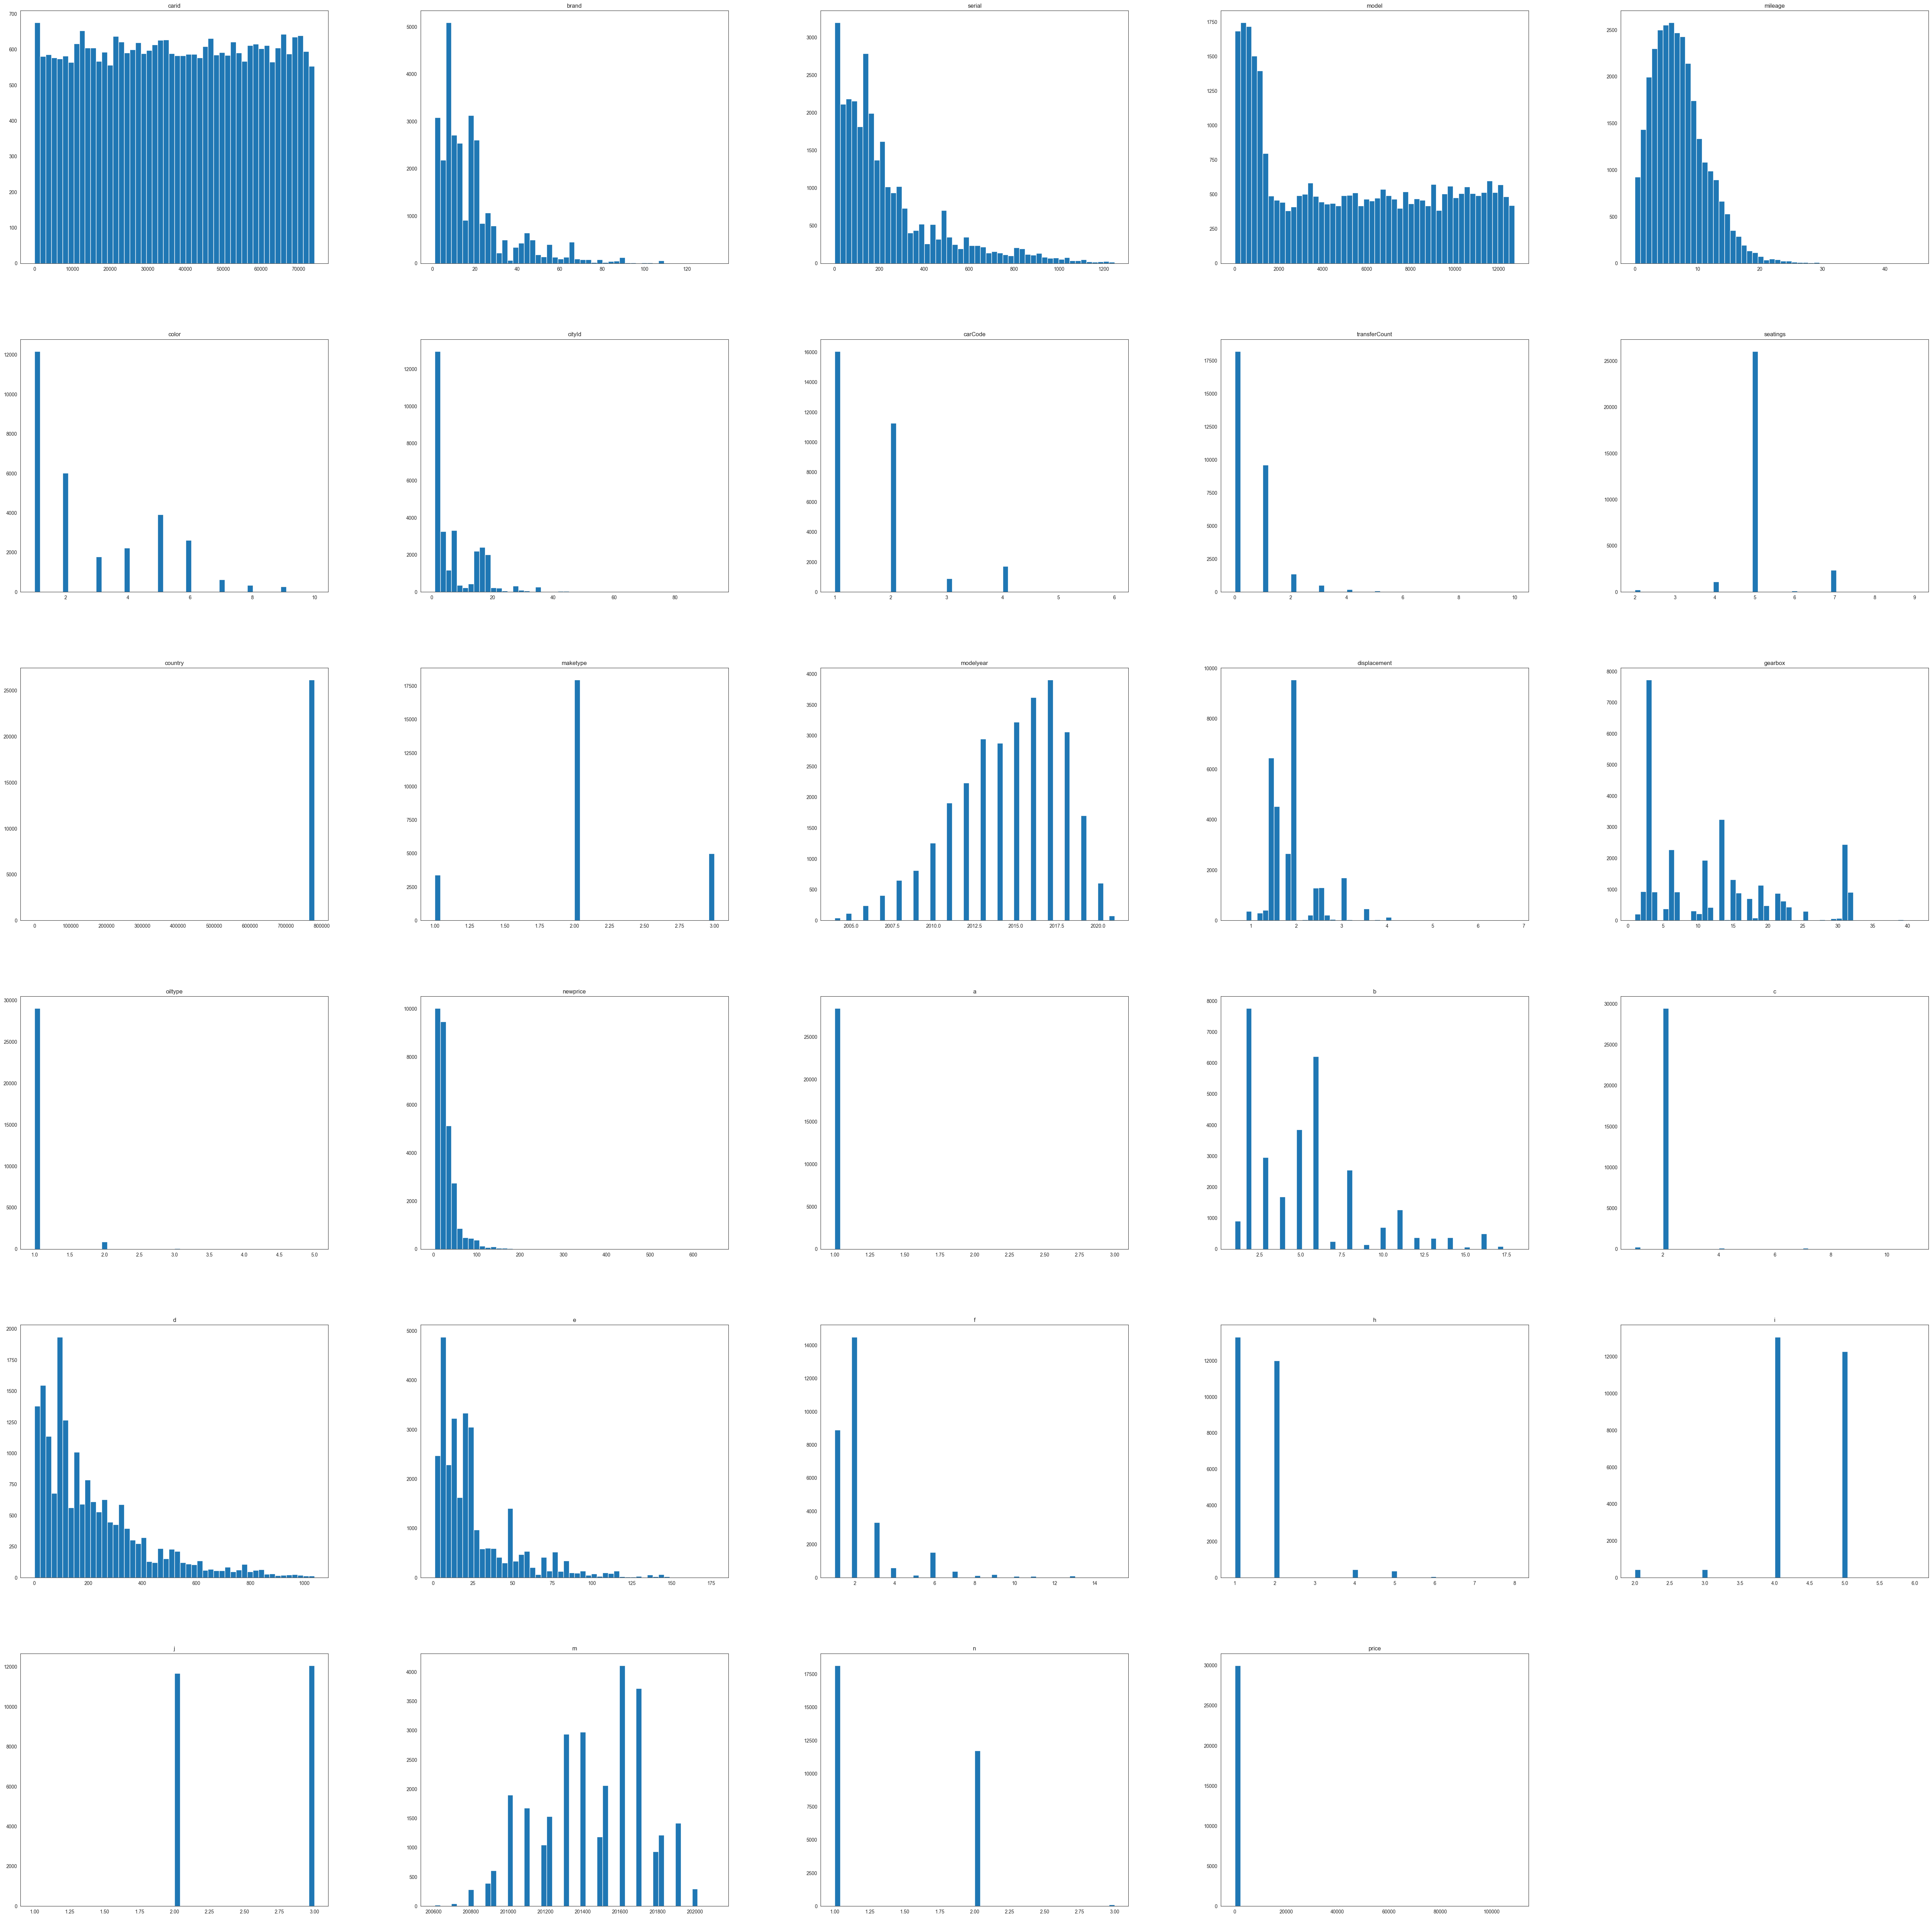

In [10]:
num_bins = int(np.floor(1+(3.3)*(np.log2(len(train_df)))))
_ = train_df.hist(column=train_df.columns, grid=False, figsize = (70, 70), bins=num_bins)

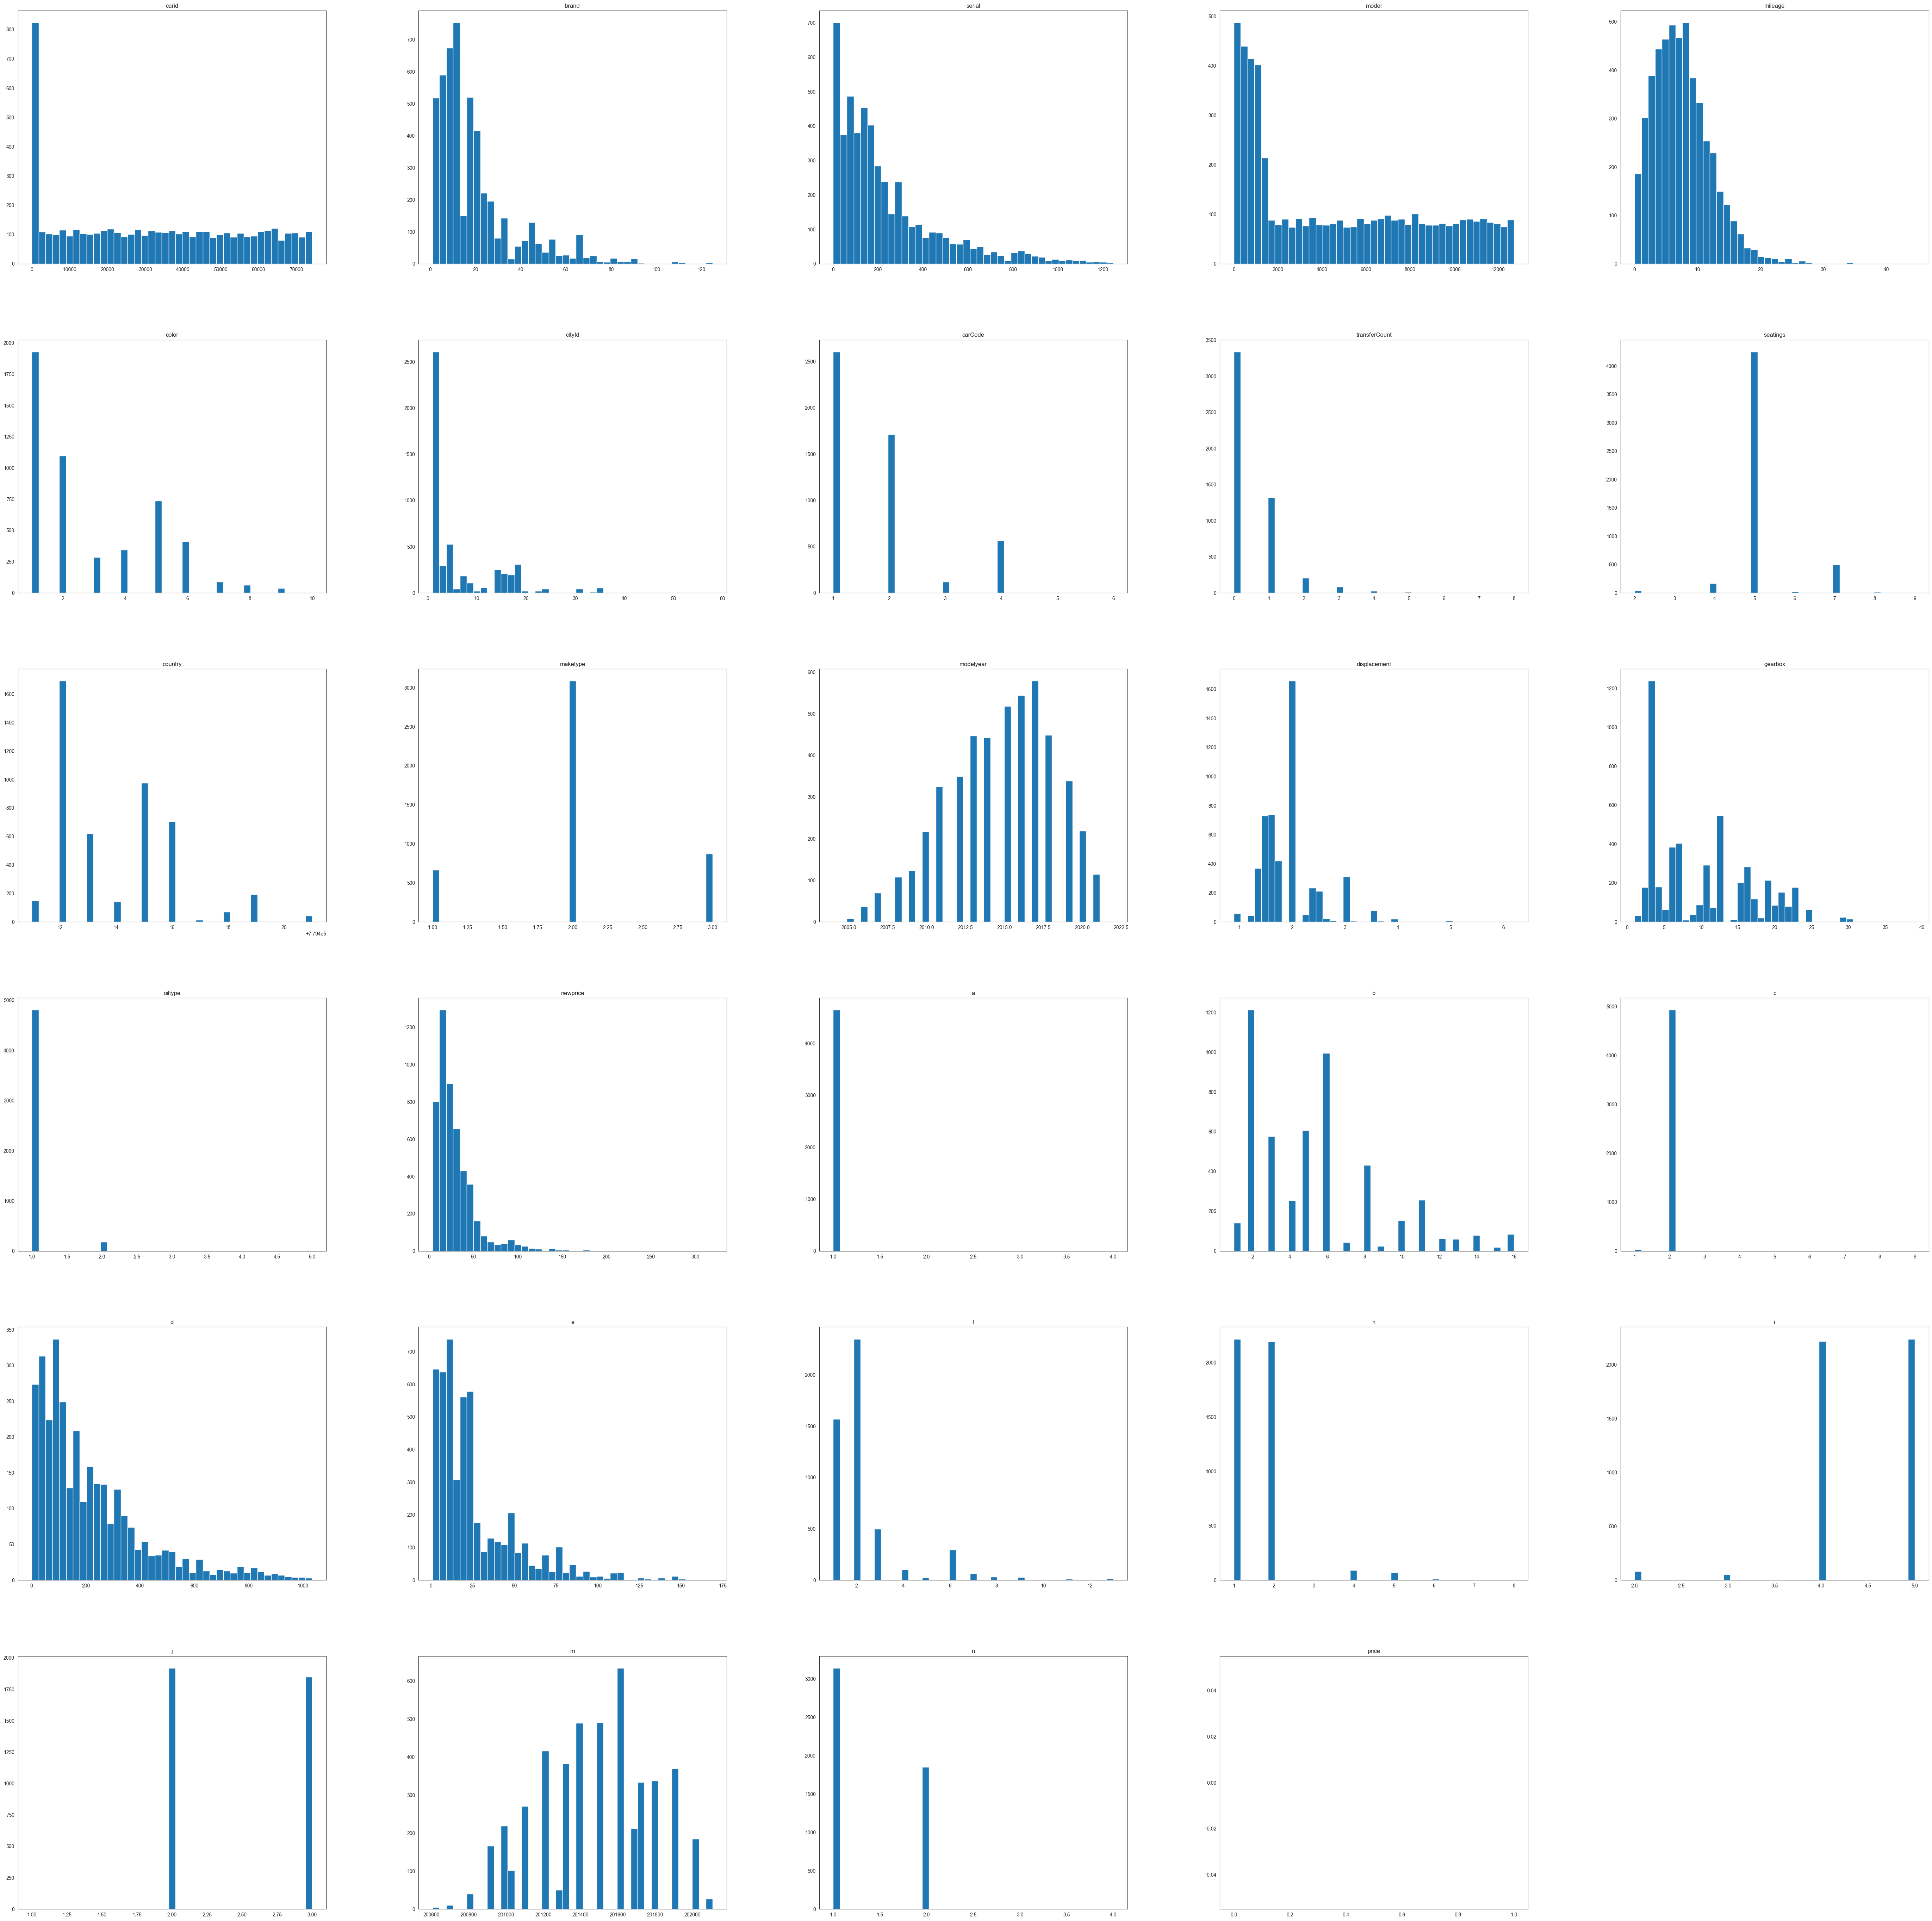

In [11]:
num_bins = int(np.floor(1+(3.3)*(np.log2(len(test_df)))))
_ = test_df.hist(column=train_df.columns, grid=False, figsize = (70, 70), bins=num_bins)

In [12]:
train_df.isna().sum()

carid                0
tradeTime            0
brand                0
serial               0
model                0
mileage              0
color                0
cityId               0
carCode              9
transferCount        0
seatings             0
registerDate         0
licenseDate          0
country           3757
maketype          3641
modelyear          312
displacement         0
gearbox              1
oiltype              0
newprice             0
a                 1582
b                    0
c                    0
d                12108
e                    0
f                    0
g                18044
h                 3775
i                 3744
j                 6241
k                  461
l                    0
m                 1619
n                    0
o                27580
price                0
dtype: int64

In [13]:
test_df.isna().sum()

carid               0
tradeTime           0
brand               0
serial              0
model               0
mileage             0
color               0
cityId              0
carCode             0
transferCount       0
seatings            0
registerDate        0
licenseDate         0
country           396
maketype          375
modelyear         106
displacement        0
gearbox             0
oiltype             0
newprice            0
a                 340
b                   0
c                   0
d                1863
e                   0
f                   0
g                3315
h                 416
i                 413
j                1231
k                  73
l                   1
m                 260
n                   0
o                4719
price            5000
dtype: int64

<font size=10> Data Preprocessing

<font size=5> Filling Missing Value

In [14]:
train_NaN_iter = train_df.columns[train_df.isna().any()]
test_NaN_iter = test_df.columns[test_df.isna().any()]
train_NaN_iter, test_NaN_iter

(Index(['carCode', 'country', 'maketype', 'modelyear', 'gearbox', 'a', 'd', 'g',
        'h', 'i', 'j', 'k', 'm', 'o'],
       dtype='object'),
 Index(['country', 'maketype', 'modelyear', 'a', 'd', 'g', 'h', 'i', 'j', 'k',
        'l', 'm', 'o', 'price'],
       dtype='object'))

In [15]:
fill_NaN_dic = {}

In [16]:
NaN_features = list(train_df.columns[train_df.isna().any()])

NaN_categ_features = ['carCode', 'country', 'maketype', 'a', 'h', 'i', 'j', 'k']

other_features = ['d', 'g', 'o']

NaN_numeric_features = list(set(NaN_features) - set(NaN_categ_features) - set(other_features))

<font size=5> Filling Missing Value of Categorical Features by Frequency

In [17]:
for col in train_NaN_iter:
    if col in NaN_categ_features:
        fill_NaN_dic[col] = train_df[col].mode()[0]
fill_NaN_dic

{'carCode': 1.0,
 'country': 779412.0,
 'maketype': 2.0,
 'a': 1.0,
 'h': 1.0,
 'i': 4.0,
 'j': 3.0,
 'k': '1+2'}

<font size=5> Filling Missing Value of Numerical Features by Median Value

In [18]:
for col in train_NaN_iter:
    if col in NaN_numeric_features:
        fill_NaN_dic[col] = train_df[col].median()
fill_NaN_dic

{'carCode': 1.0,
 'country': 779412.0,
 'maketype': 2.0,
 'a': 1.0,
 'h': 1.0,
 'i': 4.0,
 'j': 3.0,
 'k': '1+2',
 'modelyear': 2015.0,
 'gearbox': 11.0,
 'm': 201504.0}

In [19]:
for col in train_NaN_iter:
    if col in other_features:
        continue
    train_df[col] = train_df[col].fillna(fill_NaN_dic[col])

for col in test_NaN_iter:
    if col in other_features:
        continue
    if fill_NaN_dic.__contains__(col):
        test_df[col] = test_df[col].fillna(fill_NaN_dic[col])
    else:
        test_df[col] = test_df[col].fillna(train_df[col].mode()[0])
        

<font size=5> Filling Missing Value of Features of Large Amount by Median Value

<font size=3> Drop column 'd'?

In [20]:
train_df['d'].value_counts(sort=True)

d
34.0      806
91.0      656
1.0       304
159.0     295
68.0      294
         ... 
1021.0      1
1022.0      1
1023.0      1
1028.0      1
621.0       1
Name: count, Length: 851, dtype: int64

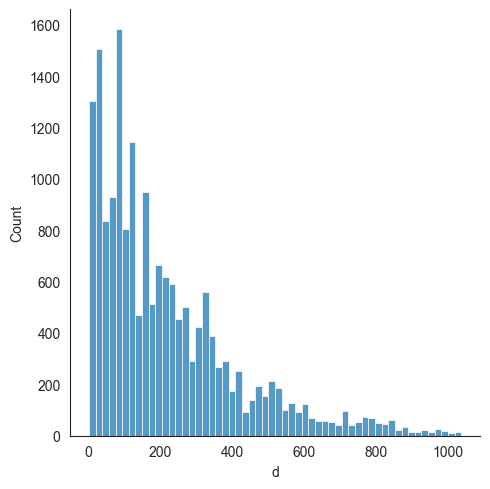

In [21]:
sns.displot(train_df['d'])
plt.show()

In [22]:
train_df[train_df['d'].isna()].describe()['price']

count     12108.000000
mean         23.899752
std         990.612026
min           0.150000
25%           6.680000
50%          10.590000
75%          17.500000
max      109000.000000
Name: price, dtype: float64

In [23]:
train_df[train_df['d'].isna().apply(lambda x: not x)].describe()['price']

count    17892.000000
mean        14.111811
std         15.247930
min          0.050000
25%          5.800000
50%         10.200000
75%         18.500000
max        678.800000
Name: price, dtype: float64

In [24]:
train_df['d'].fillna(method='ffill', inplace=True)
train_df['d'].fillna(method='backfill', inplace=True)
test_df['d'].fillna(method='ffill', inplace=True)
train_df['d'].fillna(method='backfill', inplace=True)

<font size=3> Drop column 'g'?

In [25]:
train_df['g'].value_counts(sort=True)

g
2020/10/12    45
2020/12/2     44
2020/9/9      42
2020/8/14     40
2020/12/16    40
              ..
2017/6/17      1
2014/11/27     1
2016/11/29     1
2018/4/11      1
2013/8/17      1
Name: count, Length: 1954, dtype: int64

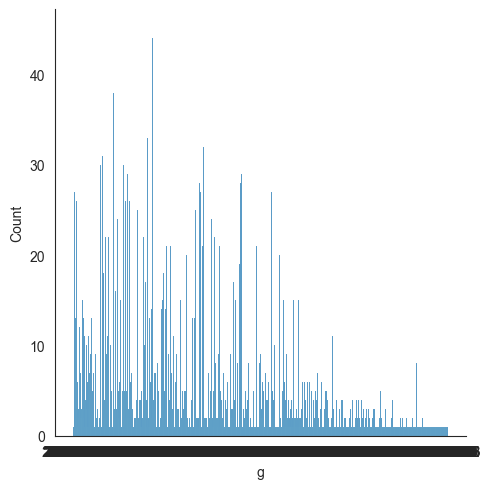

In [26]:
sns.displot(train_df['g'])
plt.show()

In [27]:
train_df[train_df['g'].isna()].describe()['price']

count     18044.000000
mean         19.755129
std         811.484372
min           0.050000
25%           5.880000
50%           9.800000
75%          17.300000
max      109000.000000
Name: price, dtype: float64

In [28]:
train_df[train_df['g'].isna().apply(lambda x: not x)].describe()['price']

count    11956.000000
mean        15.507290
std         18.357022
min          0.150000
25%          6.580000
50%         11.500000
75%         19.200000
max        678.800000
Name: price, dtype: float64

In [29]:
train_df['g'].fillna(method='ffill', inplace=True)
train_df['g'].fillna(method='backfill', inplace=True)
test_df['g'].fillna(method='ffill', inplace=True)
test_df['g'].fillna(method='backfill', inplace=True)

<font size=3> Drop column 'o'?

In [30]:
train_df['o'].value_counts(sort=True)

o
2100/12/31    51
2099/12/31    42
2100/8/8      12
2100/8/2       7
2100/7/10      7
              ..
2025/8/24      1
2034/4/9       1
2077/12/18     1
2061/6/5       1
2022/7/6       1
Name: count, Length: 1980, dtype: int64

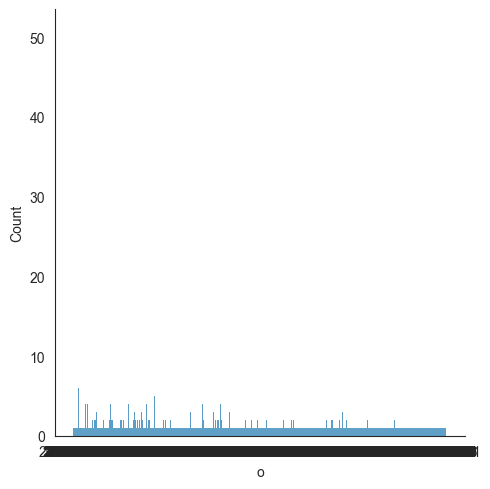

In [31]:
sns.displot(train_df['o'])
plt.show()

In [32]:
train_df[train_df['o'].isna()].describe()['price']

count     27580.000000
mean         18.442493
std         656.467455
min           0.050000
25%           6.157500
50%          10.500000
75%          18.000000
max      109000.000000
Name: price, dtype: float64

In [33]:
train_df[train_df['o'].isna().apply(lambda x: not x)].describe()['price']

count    2420.000000
mean       13.728415
std        12.727820
min         0.400000
25%         5.980000
50%         9.900000
75%        17.304975
max       195.800000
Name: price, dtype: float64

In [34]:
train_df = train_df.drop(columns='o')
test_df = test_df.drop(columns='o')

In [35]:
print(train_df.isna().sum().max())
print(test_df.isna().sum().max())

0
0


<font size=5> Drop Outliers

In [36]:
train_df[train_df['price'] > 1000]

,carid,tradeTime,brand,serial,model,mileage,color,cityId,carCode,transferCount,...,f,g,h,i,j,k,l,m,n,price
22115,49878,2020/4/9,16,37,695,4.52,8,5,1.0,0,...,1,2019/6/24,1.0,5.0,2.0,1+2,4633*1840*1530,201606.0,2,109000.0


In [37]:
train_df = train_df[train_df['price'] < 1000].reset_index(drop=True)
train_df

,carid,tradeTime,brand,serial,model,mileage,color,cityId,carCode,transferCount,...,f,g,h,i,j,k,l,m,n,price
0,1,2021/6/28,1,1,1,4.01,1,1,1.0,0,...,1,2018/8/18,1.0,5.0,2.0,1,4220*1740*1625,201709.0,1,4.24
1,2,2021/6/25,2,2,2,8.60,1,2,1.0,0,...,2,2018/8/18,2.0,4.0,3.0,1+2,4630*1775*1480,201609.0,2,7.38
2,5,2021/6/19,5,5,5,15.56,1,2,3.0,0,...,2,2018/8/18,1.0,4.0,3.0,1+2,4515*1725*1445,201504.0,2,1.00
3,6,2021/6/29,6,6,6,6.04,1,3,1.0,3,...,1,2018/8/18,2.0,5.0,2.0,1,4500*1834*1707,201608.0,2,4.38
4,7,2021/6/30,7,7,7,5.70,4,1,2.0,2,...,1,2020/9/20,1.0,5.0,2.0,1,4315*1783*1606,201204.0,1,5.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,18531,2021/5/26,34,588,4169,10.38,5,35,3.0,0,...,6,2020/10/19,1.0,5.0,2.0,1,4295*1705*1570,201504.0,1,0.88
29995,4294,2020/6/3,12,92,1797,11.69,2,1,2.0,2,...,2,2019/9/23,1.0,4.0,3.0,1+2,4960*1845*1480,201201.0,2,8.30
29996,20584,2020/9/27,7,113,501,9.87,6,1,2.0,0,...,2,2019/9/23,1.0,4.0,3.0,1,4665*1700*1510,200904.0,2,5.00
29997,11490,2020/11/9,45,131,3024,9.57,1,1,1.0,1,...,2,2020/7/9,1.0,4.0,3.0,3+2,4915*1820*1450,201508.0,1,28.00


<font size=5> Categorical Features Encoding

In [38]:
categ_features = ['tradeTime', 'brand', 'serial', 'model', 'color', 'cityId', 'cityId', 'carCode', 'registerDate', 'licenseDate', 'country', 'modelyear', 'a', 'c', 'f', 'g', 'h', 'i', 'j', 'k', 'i']

date_types = ['tradeTime', 'registerDate', 'licenseDate', 'modelyear', 'g']

categ_nondate_types = list(set(categ_features) - set(date_types))

feature_type = []
for feature in categ_nondate_types:
    feature_type.append([feature, train_df[feature].nunique()])
feature_type = pd.DataFrame(feature_type, columns=['feature', 'typeNum'])
feature_type

,feature,typeNum
0,serial,1080
1,color,10
2,cityId,88
3,f,14
4,c,11
5,carCode,6
6,model,8754
7,a,2
8,h,6
9,brand,125


In [39]:
large_feature_type = feature_type[feature_type['typeNum'] > 2 ** 6].sort_values('typeNum', ascending=False)
large_feature_type

,feature,typeNum
6,model,8754
0,serial,1080
9,brand,125
2,cityId,88


In [40]:
small_feature_type = feature_type[feature_type['typeNum'] <= 2 ** 6].sort_values('typeNum', ascending=True)
small_feature_type

,feature,typeNum
7,a,2
11,j,3
10,i,5
5,carCode,6
8,h,6
13,k,6
1,color,10
4,c,11
12,country,11
3,f,14


In [49]:
train_df

,carid,tradeTime,brand,serial,model,mileage,color,cityId,carCode,transferCount,...,f,g,h,i,j,k,l,m,n,price
0,1,2021/6/28,1,1,1,4.01,1,1,1.0,0,...,1,2018/8/18,1.0,5.0,2.0,1,4220*1740*1625,201709.0,1,4.24
1,2,2021/6/25,2,2,2,8.60,1,2,1.0,0,...,2,2018/8/18,2.0,4.0,3.0,1+2,4630*1775*1480,201609.0,2,7.38
2,5,2021/6/19,5,5,5,15.56,1,2,3.0,0,...,2,2018/8/18,1.0,4.0,3.0,1+2,4515*1725*1445,201504.0,2,1.00
3,6,2021/6/29,6,6,6,6.04,1,3,1.0,3,...,1,2018/8/18,2.0,5.0,2.0,1,4500*1834*1707,201608.0,2,4.38
4,7,2021/6/30,7,7,7,5.70,4,1,2.0,2,...,1,2020/9/20,1.0,5.0,2.0,1,4315*1783*1606,201204.0,1,5.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,18531,2021/5/26,34,588,4169,10.38,5,35,3.0,0,...,6,2020/10/19,1.0,5.0,2.0,1,4295*1705*1570,201504.0,1,0.88
29995,4294,2020/6/3,12,92,1797,11.69,2,1,2.0,2,...,2,2019/9/23,1.0,4.0,3.0,1+2,4960*1845*1480,201201.0,2,8.30
29996,20584,2020/9/27,7,113,501,9.87,6,1,2.0,0,...,2,2019/9/23,1.0,4.0,3.0,1,4665*1700*1510,200904.0,2,5.00
29997,11490,2020/11/9,45,131,3024,9.57,1,1,1.0,1,...,2,2020/7/9,1.0,4.0,3.0,3+2,4915*1820*1450,201508.0,1,28.00


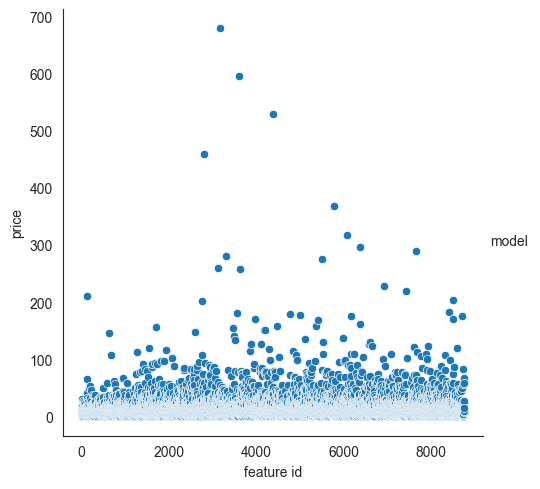

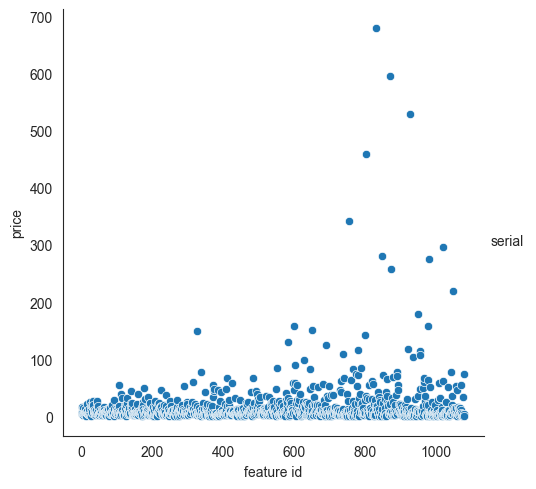

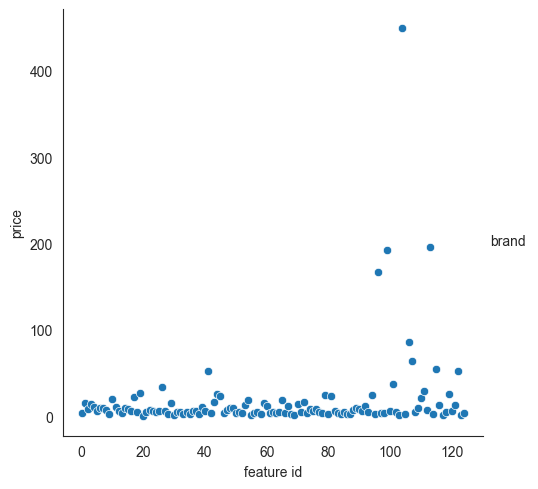

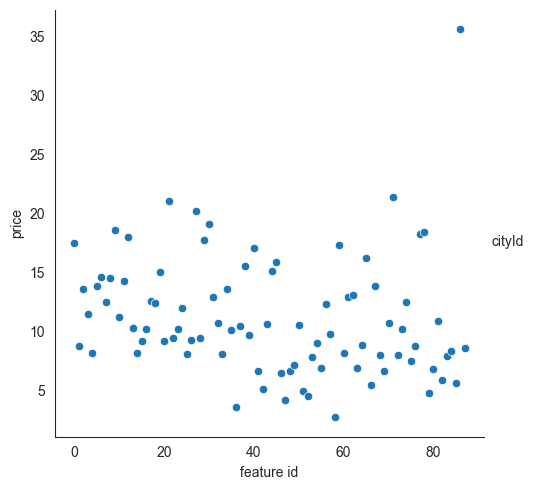

In [52]:
for feature in large_feature_type['feature']:
    temp = train_df[[feature,"price"]].groupby(feature).mean()
    ax = sns.relplot(x = np.arange(len(temp['price'])), y = temp['price'])
    ax.set_xlabels('feature id')
    ax.set_ylabels('price')
    ax.add_legend(title=feature)
    plt.show()

In [69]:
for i in range(len(large_feature_type['feature'])):
    feature = large_feature_type['feature'].values[i]
    feature_num = int(np.log2(int(np.log2(large_feature_type['typeNum'].values[i])) + 1)) + 1
    fh = FeatureHasher(n_features=2 ** feature_num, input_type='string')
    train_hashed_features = fh.fit_transform([[str(i)] for i in train_df[feature]])
    test_hashed_features = fh.transform([[str(i)] for i in test_df[feature]])
    train_hashed_features = train_hashed_features.toarray()
    test_hashed_features = test_hashed_features.toarray()
    train_df = pd.concat([train_df, pd.DataFrame(train_hashed_features, columns=[feature + str(i) for i in range(train_hashed_features.shape[1])])], axis=1)
    test_df = pd.concat([test_df, pd.DataFrame(test_hashed_features, columns=[feature + str(i) for i in range(train_hashed_features.shape[1])])], axis=1)
    
train_df.drop(columns=large_feature_type['feature'], inplace=True)
test_df.drop(columns=large_feature_type['feature'], inplace=True)

In [70]:
train_df.T

,0,1,2,3,4,5,6,7,8,9,...,29989,29990,29991,29992,29993,29994,29995,29996,29997,29998
carid,1,2,5,6,7,10,12,13,14,18,...,64261,42866,24598,72533,27237,18531,4294,20584,11490,28672
tradeTime,2021/6/28,2021/6/25,2021/6/19,2021/6/29,2021/6/30,2021/6/8,2021/6/16,2021/7/17,2021/7/30,2021/5/30,...,2021/6/19,2020/7/7,2021/7/6,2021/2/4,2021/4/19,2021/5/26,2020/6/3,2020/9/27,2020/11/9,2020/12/7
mileage,4.01,8.6,15.56,6.04,5.7,13.02,7.03,4.64,16.27,5.45,...,3.63,4.54,7.14,6.87,5.79,10.38,11.69,9.87,9.57,3.92
color,1,1,1,1,4,1,5,1,4,1,...,3,1,1,1,2,5,2,6,1,1
carCode,1.0,1.0,3.0,1.0,2.0,3.0,2.0,1.0,2.0,1.0,...,4.0,1.0,2.0,2.0,1.0,3.0,2.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cityId3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cityId4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
cityId5,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,...,0.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,0.0
cityId6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
test_df.T

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
carid,3,4,8,9,11,15,17,19,21,27,...,30403,59448,7270,32748,63256,55510,1768,20723,15625,51844
tradeTime,2021/9/26,2021/8/14,2021/10/9,2021/9/30,2021/8/9,2021/8/30,2021/8/7,2021/9/10,2021/9/10,2021/8/1,...,2021/10/23,2021/10/12,2021/8/3,2021/10/17,2021/11/25,2021/10/28,2021/8/23,2021/9/3,2021/10/29,2021/9/5
mileage,6.64,8.04,10.19,2.27,7.03,12.3,7.27,6.02,5.7,16.99,...,5.92,8.27,3.91,8.51,5.26,8.53,11.11,11.02,6.21,8.5
color,2,3,5,2,2,2,1,1,6,7,...,4,4,4,4,5,1,1,2,4,2
carCode,1,2,2,4,1,1,1,1,1,2,...,1,2,1,2,1,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cityId3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
cityId4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
cityId5,0.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0
cityId6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


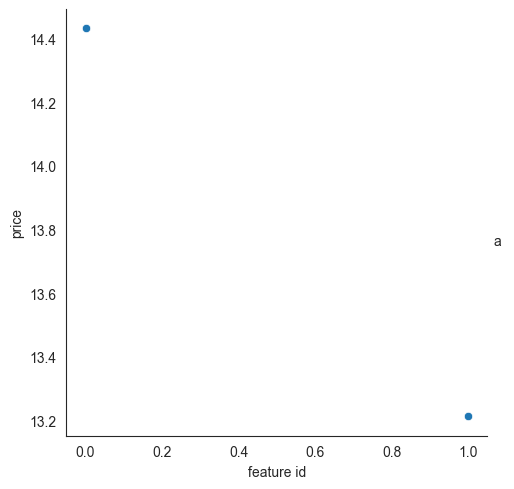

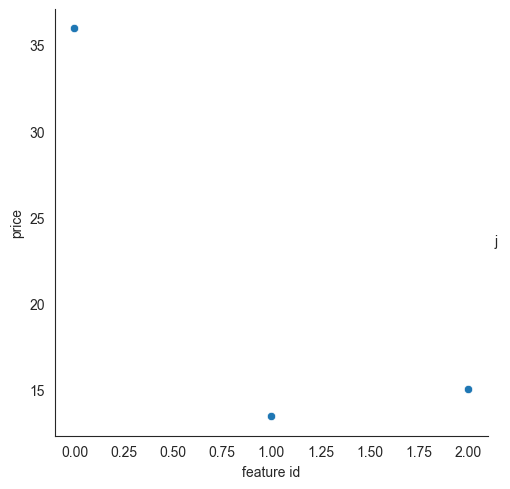

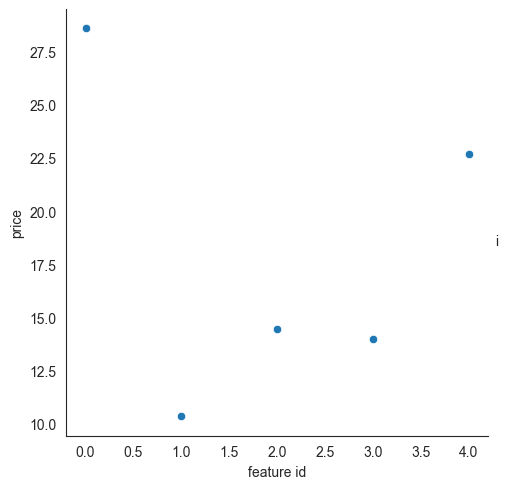

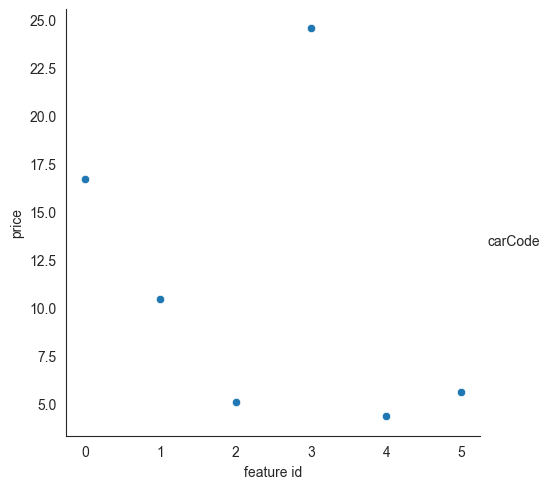

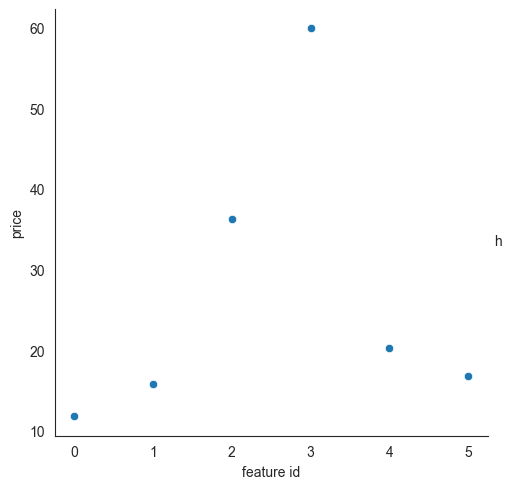

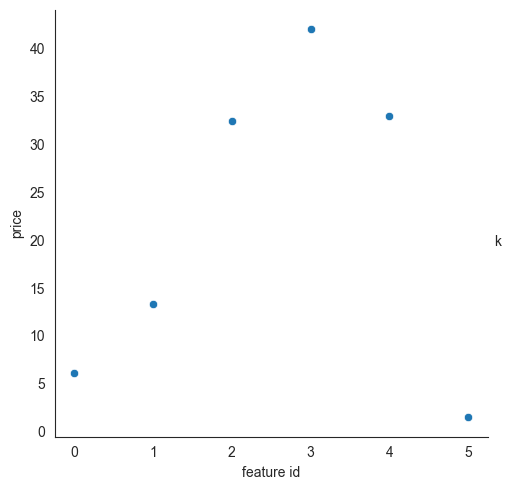

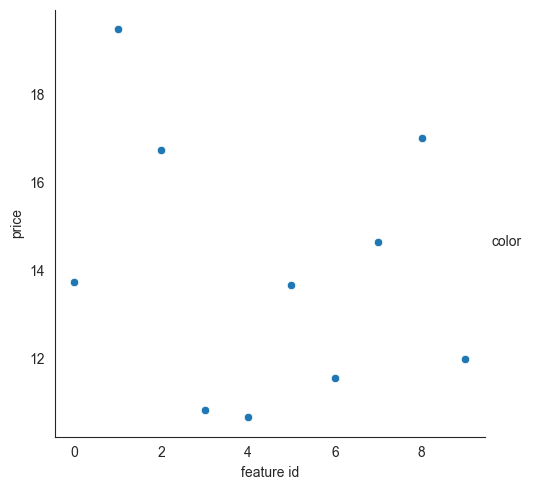

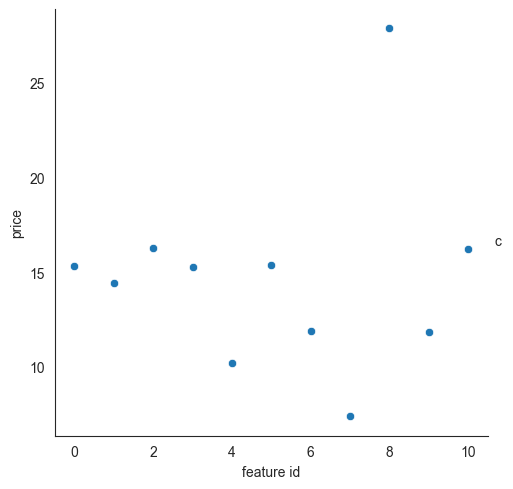

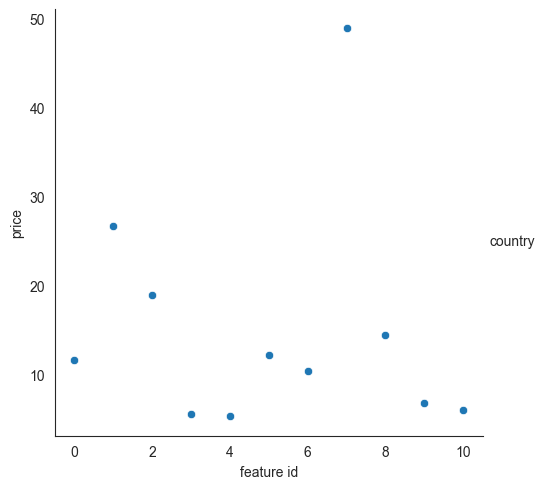

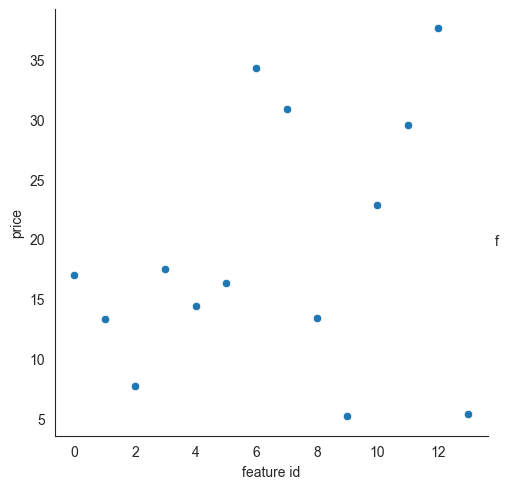

In [74]:
for feature in small_feature_type['feature']:
    temp = train_df[[feature, 'price']].groupby(feature).mean()
    ax = sns.relplot(x = np.arange(len(temp['price'])), y = temp['price'])
    ax.set_xlabels('feature id')
    ax.set_ylabels('price')
    ax.add_legend(title=feature)
    plt.show()

In [75]:
encoder = ce.OneHotEncoder(cols=small_feature_type['feature'].values)
train_df = encoder.fit_transform(train_df)
test_df = encoder.transform(test_df)

In [76]:
np.array(train_df.columns)

array(['carid', 'tradeTime', 'mileage', 'color_1', 'color_2', 'color_3',
       'color_4', 'color_5', 'color_6', 'color_7', 'color_8', 'color_9',
       'color_10', 'carCode_1', 'carCode_2', 'carCode_3', 'carCode_4',
       'carCode_5', 'carCode_6', 'transferCount', 'seatings',
       'registerDate', 'licenseDate', 'country_1', 'country_2',
       'country_3', 'country_4', 'country_5', 'country_6', 'country_7',
       'country_8', 'country_9', 'country_10', 'country_11', 'maketype',
       'modelyear', 'displacement', 'gearbox', 'oiltype', 'newprice',
       'a_1', 'a_2', 'b', 'c_1', 'c_2', 'c_3', 'c_4', 'c_5', 'c_6', 'c_7',
       'c_8', 'c_9', 'c_10', 'c_11', 'd', 'e', 'f_1', 'f_2', 'f_3', 'f_4',
       'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10', 'f_11', 'f_12', 'f_13',
       'f_14', 'g', 'h_1', 'h_2', 'h_3', 'h_4', 'h_5', 'h_6', 'i_1',
       'i_2', 'i_3', 'i_4', 'i_5', 'j_1', 'j_2', 'j_3', 'k_1', 'k_2',
       'k_3', 'k_4', 'k_5', 'k_6', 'l', 'm', 'n', 'price', 'model0',
       'mo

In [77]:
np.array(test_df.columns)

array(['carid', 'tradeTime', 'mileage', 'color_1', 'color_2', 'color_3',
       'color_4', 'color_5', 'color_6', 'color_7', 'color_8', 'color_9',
       'color_10', 'carCode_1', 'carCode_2', 'carCode_3', 'carCode_4',
       'carCode_5', 'carCode_6', 'transferCount', 'seatings',
       'registerDate', 'licenseDate', 'country_1', 'country_2',
       'country_3', 'country_4', 'country_5', 'country_6', 'country_7',
       'country_8', 'country_9', 'country_10', 'country_11', 'maketype',
       'modelyear', 'displacement', 'gearbox', 'oiltype', 'newprice',
       'a_1', 'a_2', 'b', 'c_1', 'c_2', 'c_3', 'c_4', 'c_5', 'c_6', 'c_7',
       'c_8', 'c_9', 'c_10', 'c_11', 'd', 'e', 'f_1', 'f_2', 'f_3', 'f_4',
       'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10', 'f_11', 'f_12', 'f_13',
       'f_14', 'g', 'h_1', 'h_2', 'h_3', 'h_4', 'h_5', 'h_6', 'i_1',
       'i_2', 'i_3', 'i_4', 'i_5', 'j_1', 'j_2', 'j_3', 'k_1', 'k_2',
       'k_3', 'k_4', 'k_5', 'k_6', 'l', 'm', 'n', 'price', 'model0',
       'mo

In [78]:
train_df[date_types].T

,0,1,2,3,4,5,6,7,8,9,...,29989,29990,29991,29992,29993,29994,29995,29996,29997,29998
tradeTime,2021/6/28,2021/6/25,2021/6/19,2021/6/29,2021/6/30,2021/6/8,2021/6/16,2021/7/17,2021/7/30,2021/5/30,...,2021/6/19,2020/7/7,2021/7/6,2021/2/4,2021/4/19,2021/5/26,2020/6/3,2020/9/27,2020/11/9,2020/12/7
registerDate,2017/12/1,2016/12/1,2008/2/1,2016/8/1,2012/8/1,2006/10/1,2011/10/1,2018/11/1,2007/7/1,2015/9/1,...,2019/5/1,2017/7/1,2012/6/1,2013/11/1,2016/3/1,2007/2/1,2012/3/1,2011/12/1,2016/4/1,2018/3/1
licenseDate,2018/1/26,2017/3/21,2008/2/27,2016/9/9,2012/8/28,2006/11/27,2012/3/13,2018/12/25,2007/7/17,2016/11/11,...,2019/6/3,2017/8/11,2012/9/20,2013/12/4,2016/7/1,2007/3/25,2012/5/9,2012/2/3,2016/5/17,2018/4/12
modelyear,2017.0,2017.0,2008.0,2016.0,2012.0,2006.0,2010.0,2018.0,2006.0,2015.0,...,2019.0,2017.0,2011.0,2013.0,2016.0,2006.0,2012.0,2009.0,2015.0,2018.0
g,2018/8/18,2018/8/18,2018/8/18,2018/8/18,2020/9/20,2021/5/31,2021/5/31,2021/5/31,2021/5/31,2021/5/31,...,2019/5/10,2019/5/10,2019/5/10,2020/10/19,2020/10/19,2020/10/19,2019/9/23,2019/9/23,2020/7/9,2020/7/9


In [79]:
for date in date_types:
    train_df[date] = pd.to_numeric(pd.to_datetime(train_df[date])).values
    test_df[date] = pd.to_numeric(pd.to_datetime(test_df[date])).values

<font size=5> Polynomial Features Generation

In [80]:
train_feature_l = [str(i).split('*') for i in train_df['l'].values]
test_feature_l = [str(i).split('*') for i in test_df['l'].values]
train_df = pd.concat([train_df, pd.DataFrame(train_feature_l, columns=['l1', 'l2', 'l3'])], axis=1)
test_df = pd.concat([test_df, pd.DataFrame(test_feature_l, columns=['l1', 'l2', 'l3'])], axis=1)
train_df.drop(columns = 'l', inplace=True)
test_df.drop(columns = 'l', inplace=True)

In [ ]:
poly_feature = PolynomialFeatures(interaction_only = True, include_bias = False)
train_poly_L = poly_feature.fit_transform(train_df[['l1', 'l2', 'l3']].to_numpy())
test_poly_L = poly_feature.transform(test_df[['l1', 'l2', 'l3']].to_numpy())
train_df = pd.concat([train_df, pd.DataFrame(train_poly_L, columns=['l' + str(i) for i in range(4, 10)])], axis=1)
test_df = pd.concat([test_df, pd.DataFrame(test_poly_L, columns=['l' + str(i) for i in range(4, 10)])], axis=1)

In [ ]:
train_df.T

,0,1,2,3,4,5,6,7,8,9,...,29989,29990,29991,29992,29993,29994,29995,29996,29997,29998
carid,1,2,5,6,7,10,12,13,14,18,...,64261,42866,24598,72533,27237,18531,4294,20584,11490,28672
tradeTime,1624838400000000000,1624579200000000000,1624060800000000000,1624924800000000000,1625011200000000000,1623110400000000000,1623801600000000000,1626480000000000000,1627603200000000000,1622332800000000000,...,1624060800000000000,1594080000000000000,1625529600000000000,1612396800000000000,1618790400000000000,1621987200000000000,1591142400000000000,1601164800000000000,1604880000000000000,1607299200000000000
mileage,4.01,8.6,15.56,6.04,5.7,13.02,7.03,4.64,16.27,5.45,...,3.63,4.54,7.14,6.87,5.79,10.38,11.69,9.87,9.57,3.92
color_1,1,1,1,1,0,1,0,1,0,1,...,0,1,1,1,0,0,0,0,1,1
color_2,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
l5,1740.0,1775.0,1725.0,1834.0,1783.0,1690.0,1640.0,1785.0,1760.0,1786.0,...,1891.0,1839.0,1755.0,1880.0,1859.0,1705.0,1845.0,1700.0,1820.0,1823.0
l6,1625.0,1480.0,1445.0,1707.0,1606.0,1450.0,1535.0,1460.0,1461.0,1455.0,...,1689.0,1660.0,1475.0,1686.0,1695.0,1570.0,1480.0,1510.0,1450.0,1456.0
l7,7342800.0,8218250.0,7788375.0,8253000.0,7693645.0,7241650.0,6806000.0,8353800.0,7997440.0,8156662.0,...,8919847.0,8582613.0,8064225.0,8883000.0,8642491.0,7322975.0,9151200.0,7930500.0,8945300.0,8872541.0
l8,6857500.0,6852400.0,6524175.0,7681500.0,6929890.0,6213250.0,6370250.0,6832800.0,6638784.0,6644985.0,...,7967013.0,7747220.0,6777625.0,7966350.0,7880055.0,6743150.0,7340800.0,7044150.0,7126750.0,7086352.0


In [ ]:
test_df.T

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
carid,3,4,8,9,11,15,17,19,21,27,...,30403,59448,7270,32748,63256,55510,1768,20723,15625,51844
tradeTime,1632614400000000000,1628899200000000000,1633737600000000000,1632960000000000000,1628467200000000000,1630281600000000000,1628294400000000000,1631232000000000000,1631232000000000000,1627776000000000000,...,1634947200000000000,1633996800000000000,1627948800000000000,1634428800000000000,1637798400000000000,1635379200000000000,1629676800000000000,1630627200000000000,1635465600000000000,1630800000000000000
mileage,6.64,8.04,10.19,2.27,7.03,12.3,7.27,6.02,5.7,16.99,...,5.92,8.27,3.91,8.51,5.26,8.53,11.11,11.02,6.21,8.5
color_1,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,1,0,0,0
color_2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
l5,1925.0,1683.0,1674.0,1830.0,1836.0,1874.0,1850.0,1815.0,1833.0,1855.0,...,1837.0,1758.0,1755.0,1868.0,1843.0,1805.0,1770.0,1795.0,1740.0,1834.0
l6,1734.0,1407.0,1415.0,1705.0,1469.0,1466.0,1465.0,1640.0,1560.0,1725.0,...,1612.0,1460.0,1605.0,1756.0,1432.0,1695.0,1480.0,1475.0,1635.0,1484.0
l7,9390150.0,6265809.0,7390710.0,8507670.0,9056988.0,9437464.0,8954000.0,7804500.0,8138520.0,8922550.0,...,8053408.0,7928580.0,7256925.0,8729164.0,8879574.0,8745225.0,8389800.0,8705750.0,7134000.0,8935248.0
l8,8458452.0,5238261.0,6247225.0,7926545.0,7246577.0,7382776.0,7090600.0,7052000.0,6926400.0,8297250.0,...,7067008.0,6584600.0,6636675.0,8205788.0,6899376.0,8212275.0,7015200.0,7153750.0,6703500.0,7230048.0


<font size=5> Numerical Features Normalization

In [82]:
numerical_types = list(set(pd.read_csv(train_path).columns) - set(categ_features)) + date_types
numerical_types.remove('l')
numerical_types.remove('o')
numerical_types

['gearbox',
 'm',
 'seatings',
 'maketype',
 'newprice',
 'displacement',
 'e',
 'oiltype',
 'carid',
 'd',
 'transferCount',
 'b',
 'n',
 'price',
 'mileage',
 'tradeTime',
 'registerDate',
 'licenseDate',
 'modelyear',
 'g']

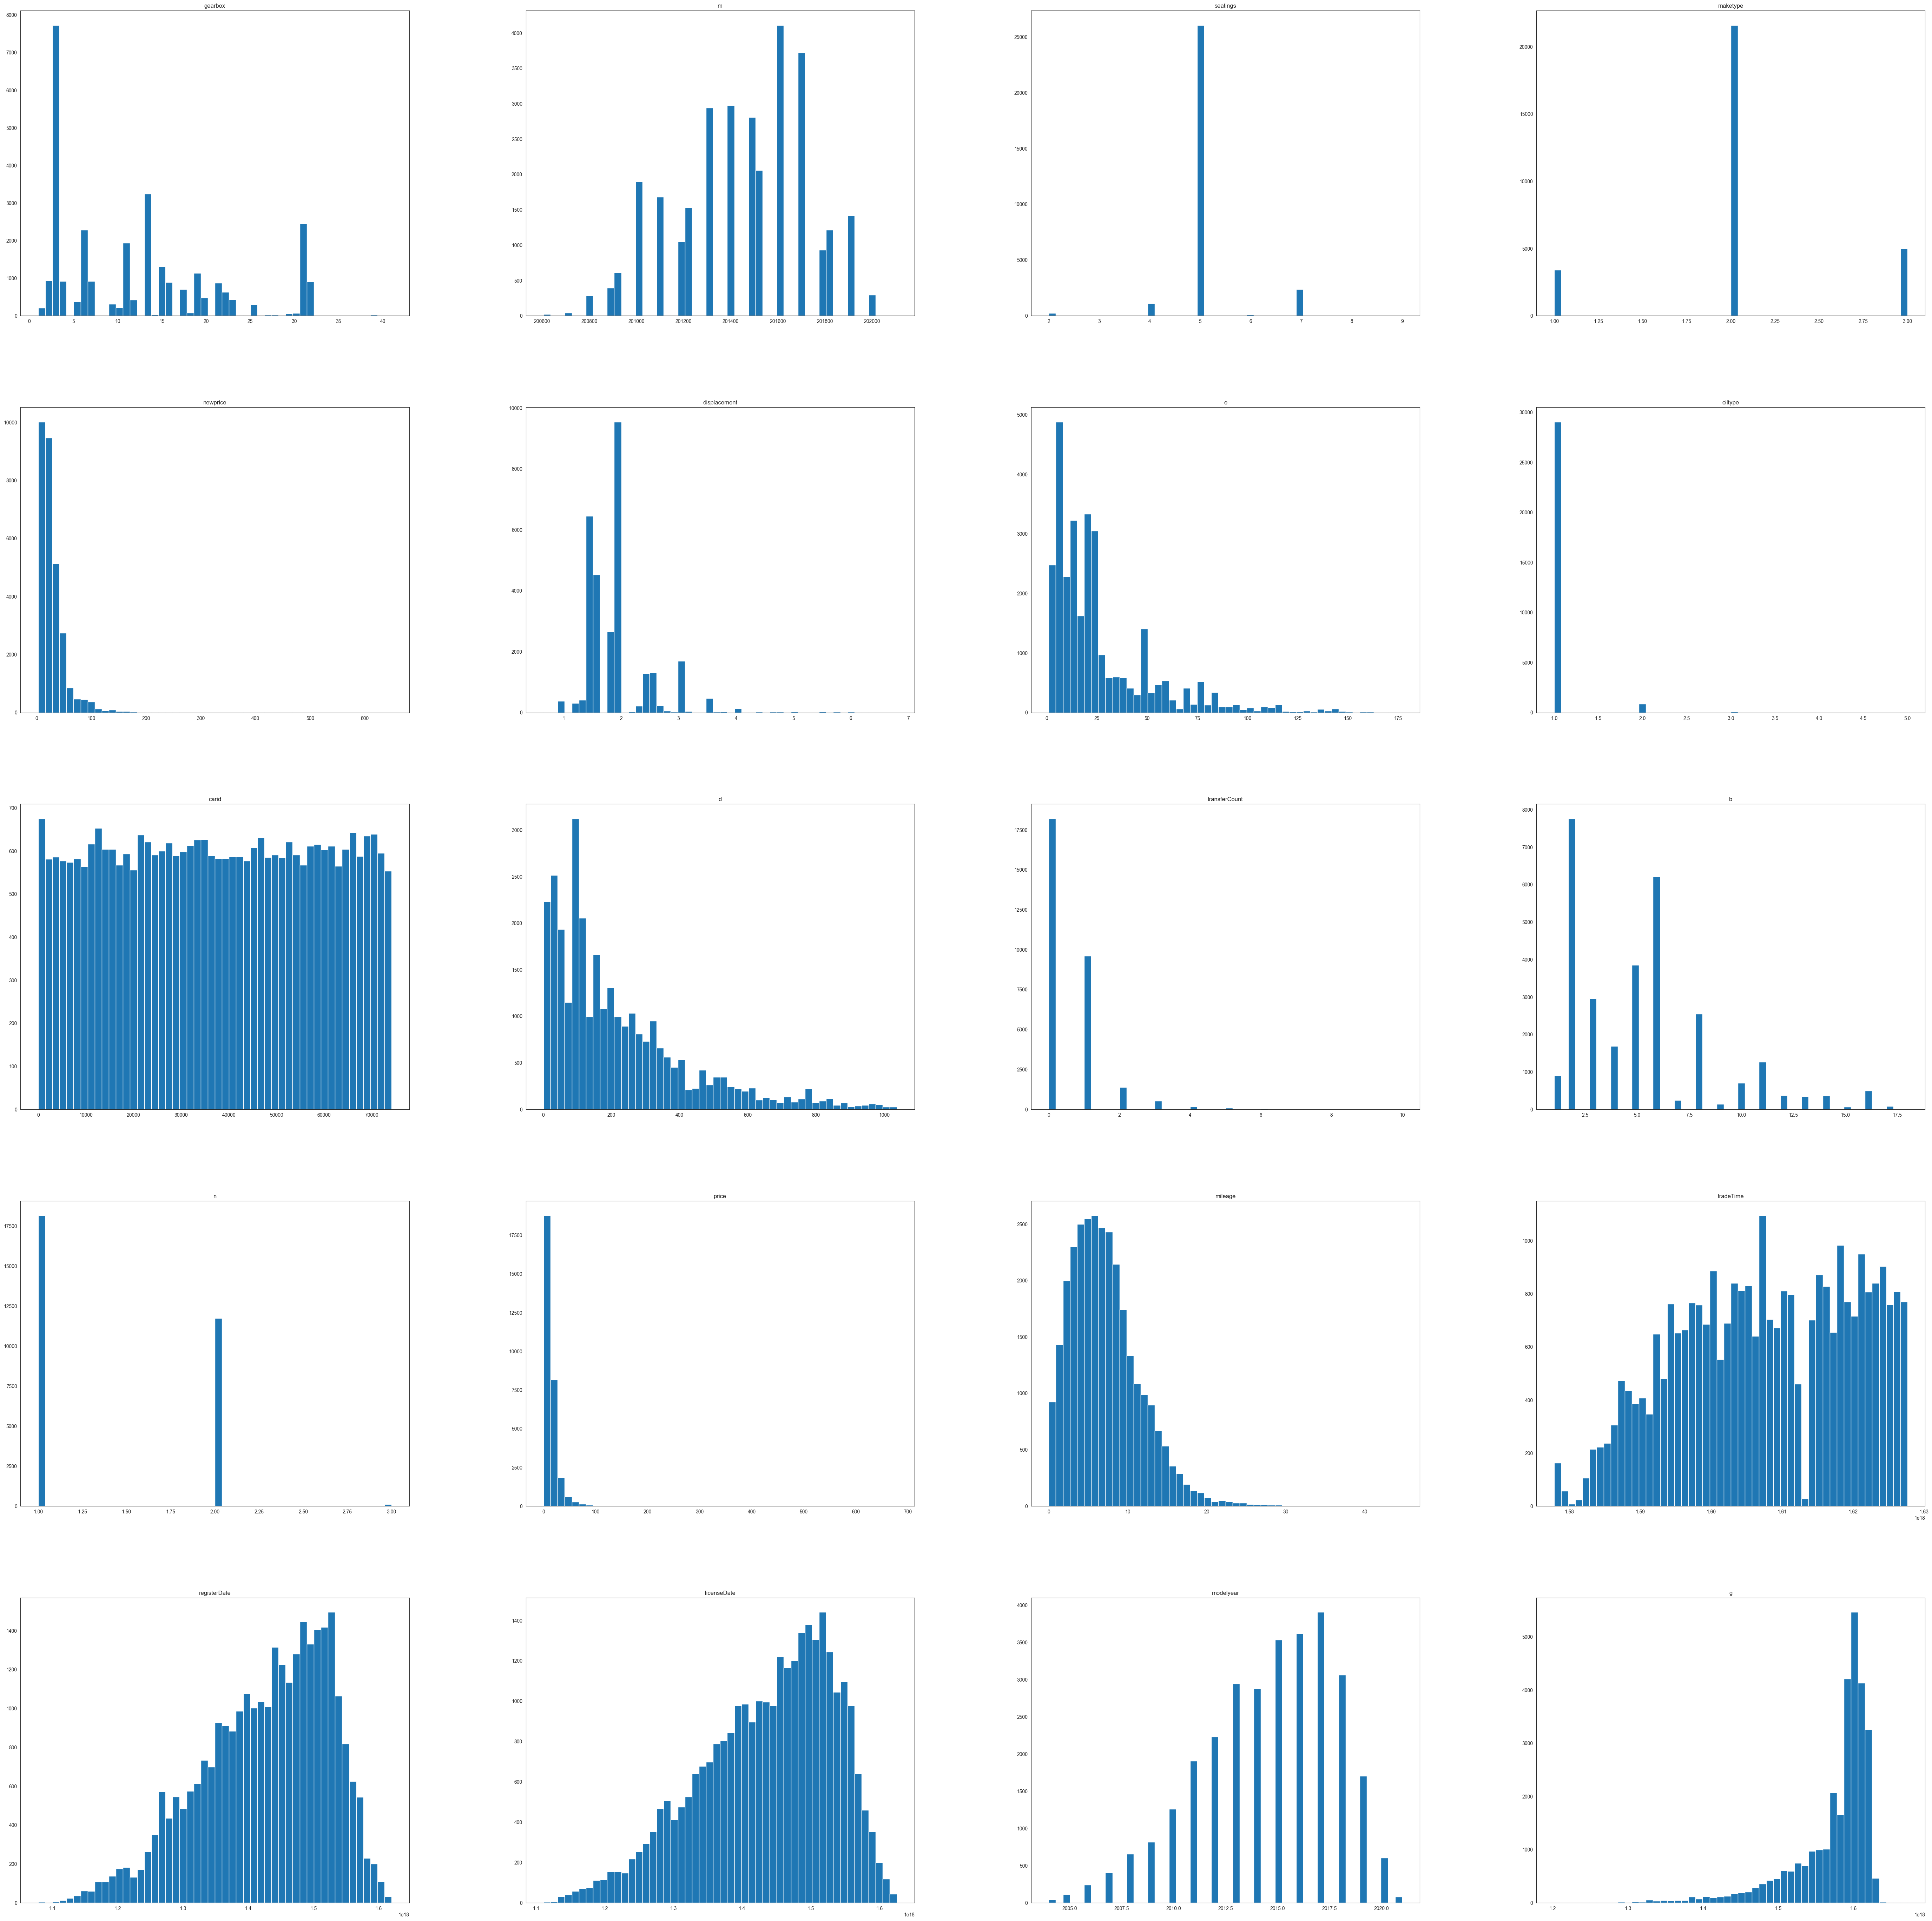

In [83]:
num_bins = int(np.floor(1+(3.3)*(np.log2(len(train_df)))))
_ = train_df.hist(column = numerical_types, grid=False, figsize = (70, 70), bins=num_bins)

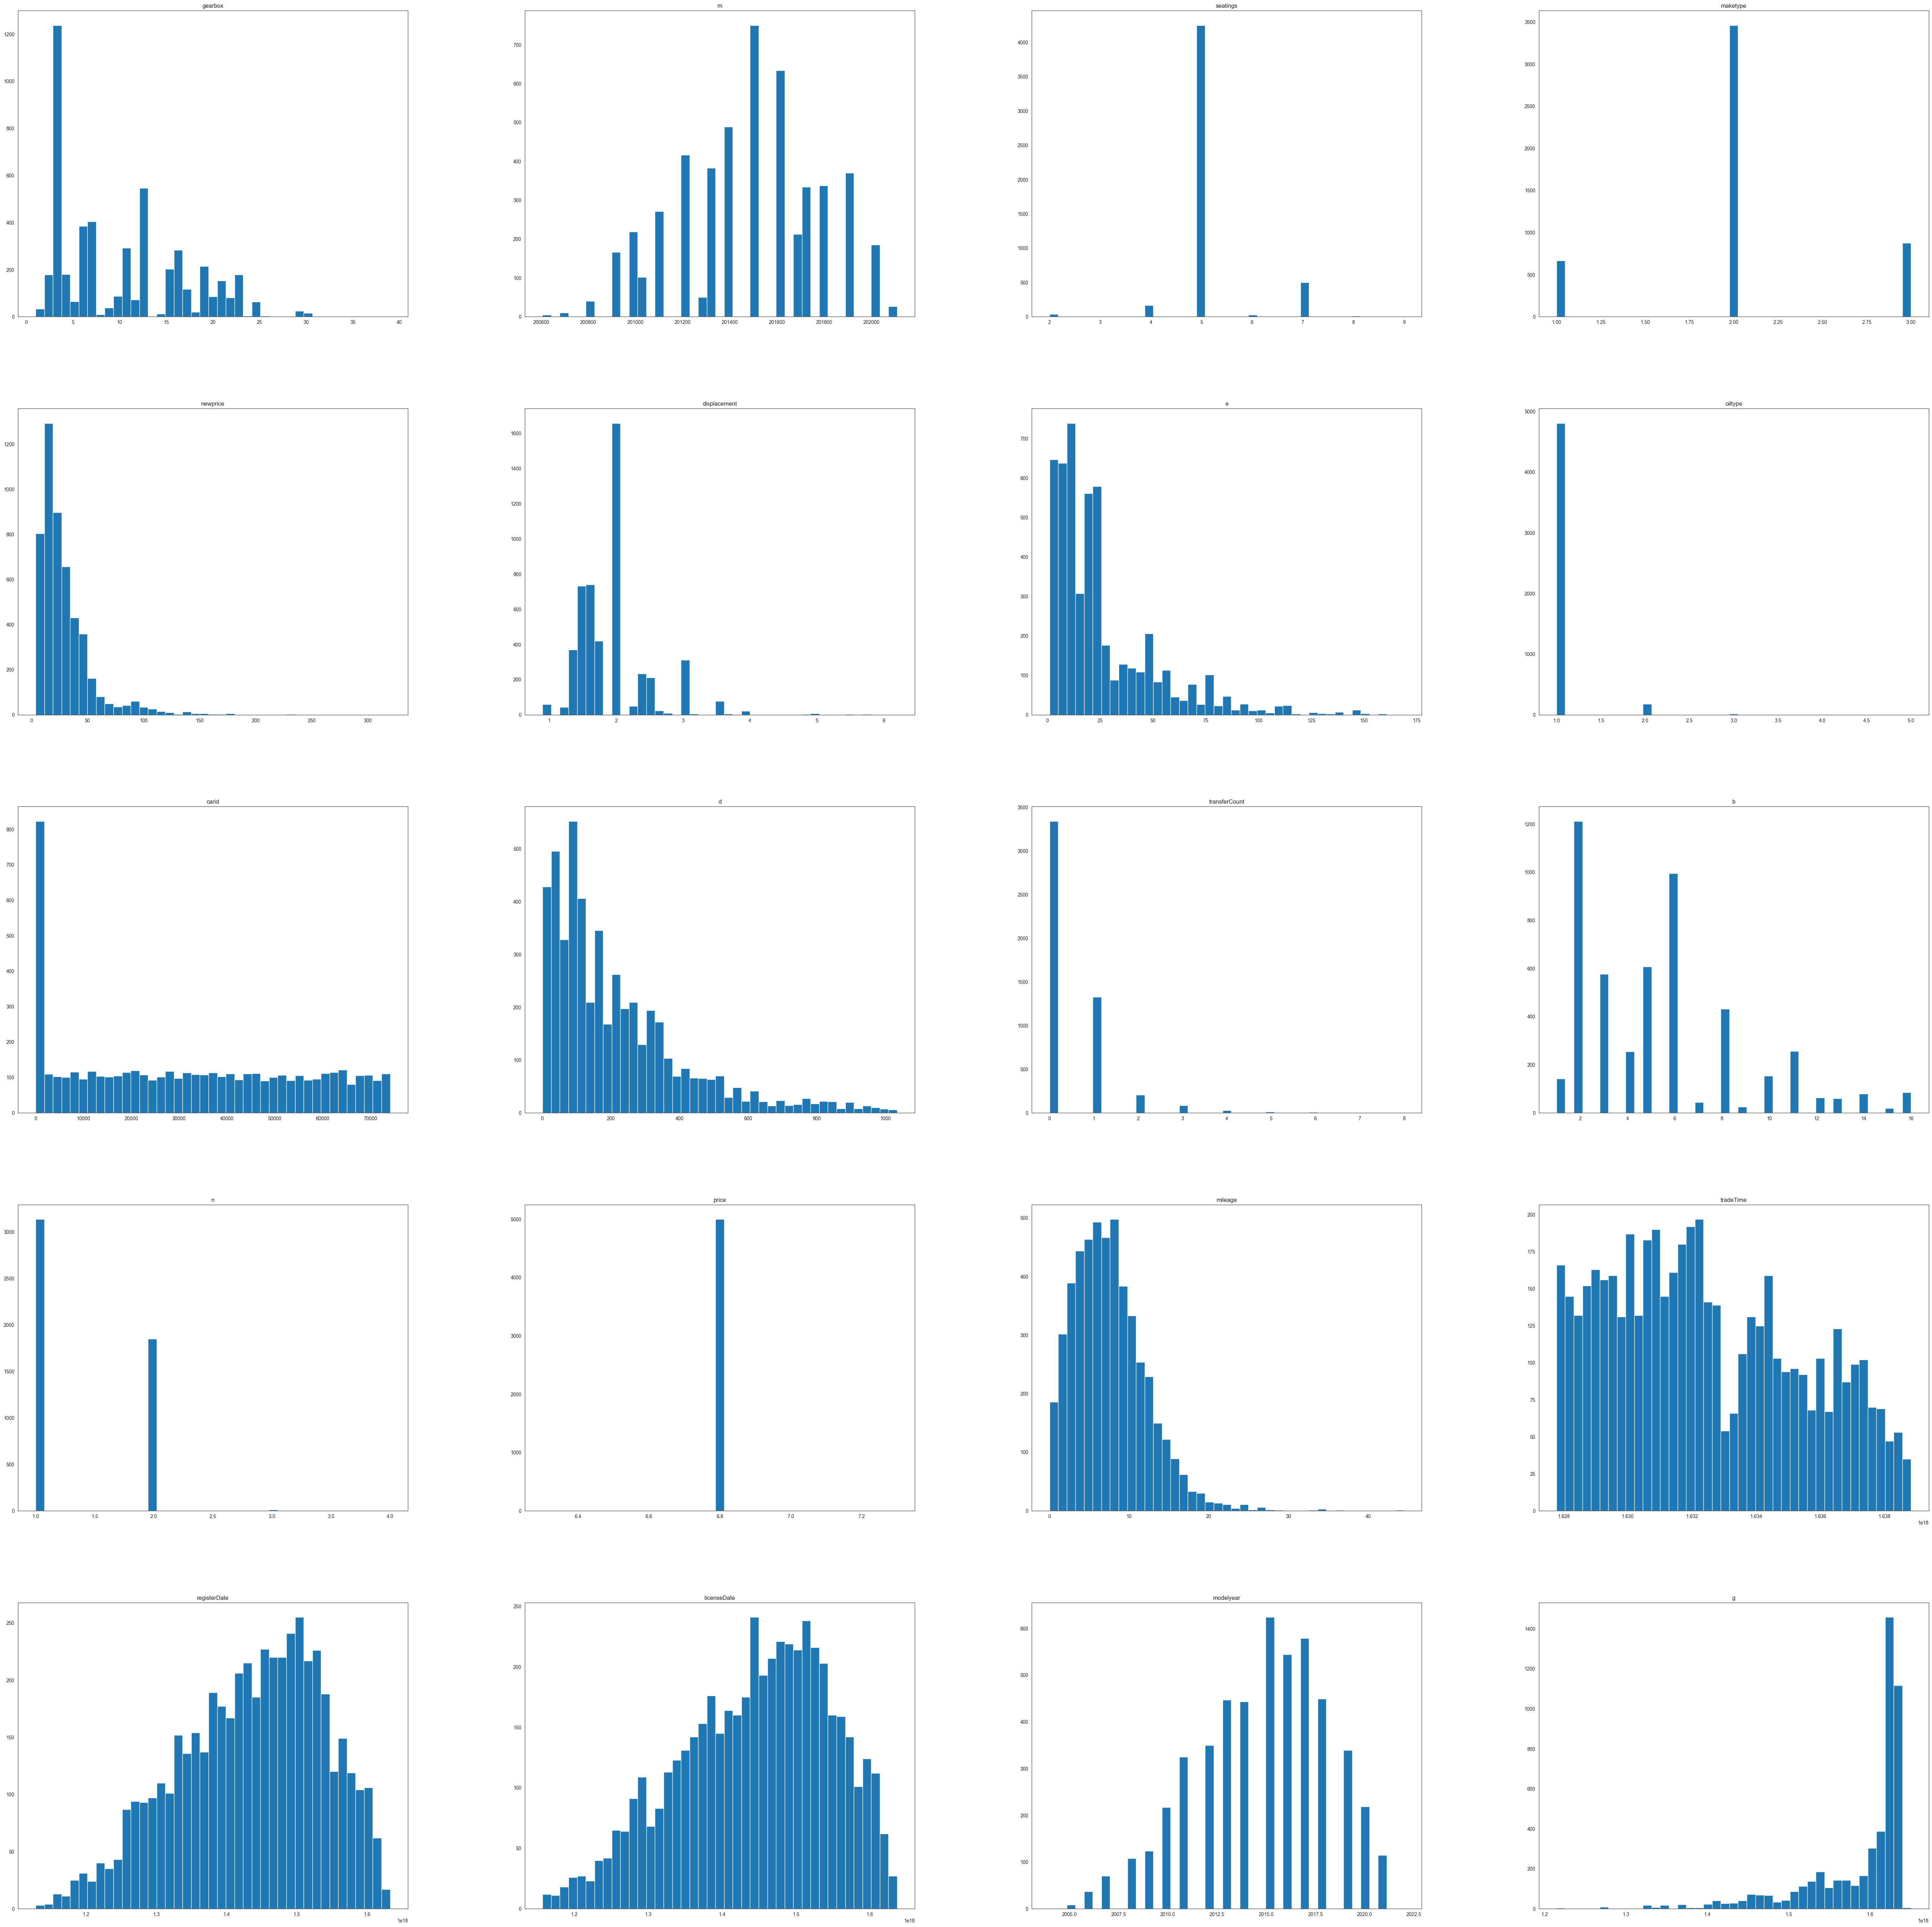

In [84]:
num_bins = int(np.floor(1+(3.3)*(np.log2(len(test_df)))))
_ = test_df.hist(column = numerical_types, grid=False, figsize = (70, 70), bins=num_bins)

In [85]:
train_df['mileage'] = np.log1p(train_df['mileage'].values)
test_df['mileage'] = np.log1p(test_df['mileage'].values)
train_df['d'] = np.log1p(train_df['d'].values)
test_df['d'] = np.log1p(test_df['d'].values)
train_df['newprice'] = np.log1p(train_df['newprice'].values)
test_df['newprice'] = np.log1p(test_df['newprice'].values)

train_df['price'] = np.log1p(train_df['price'].values)

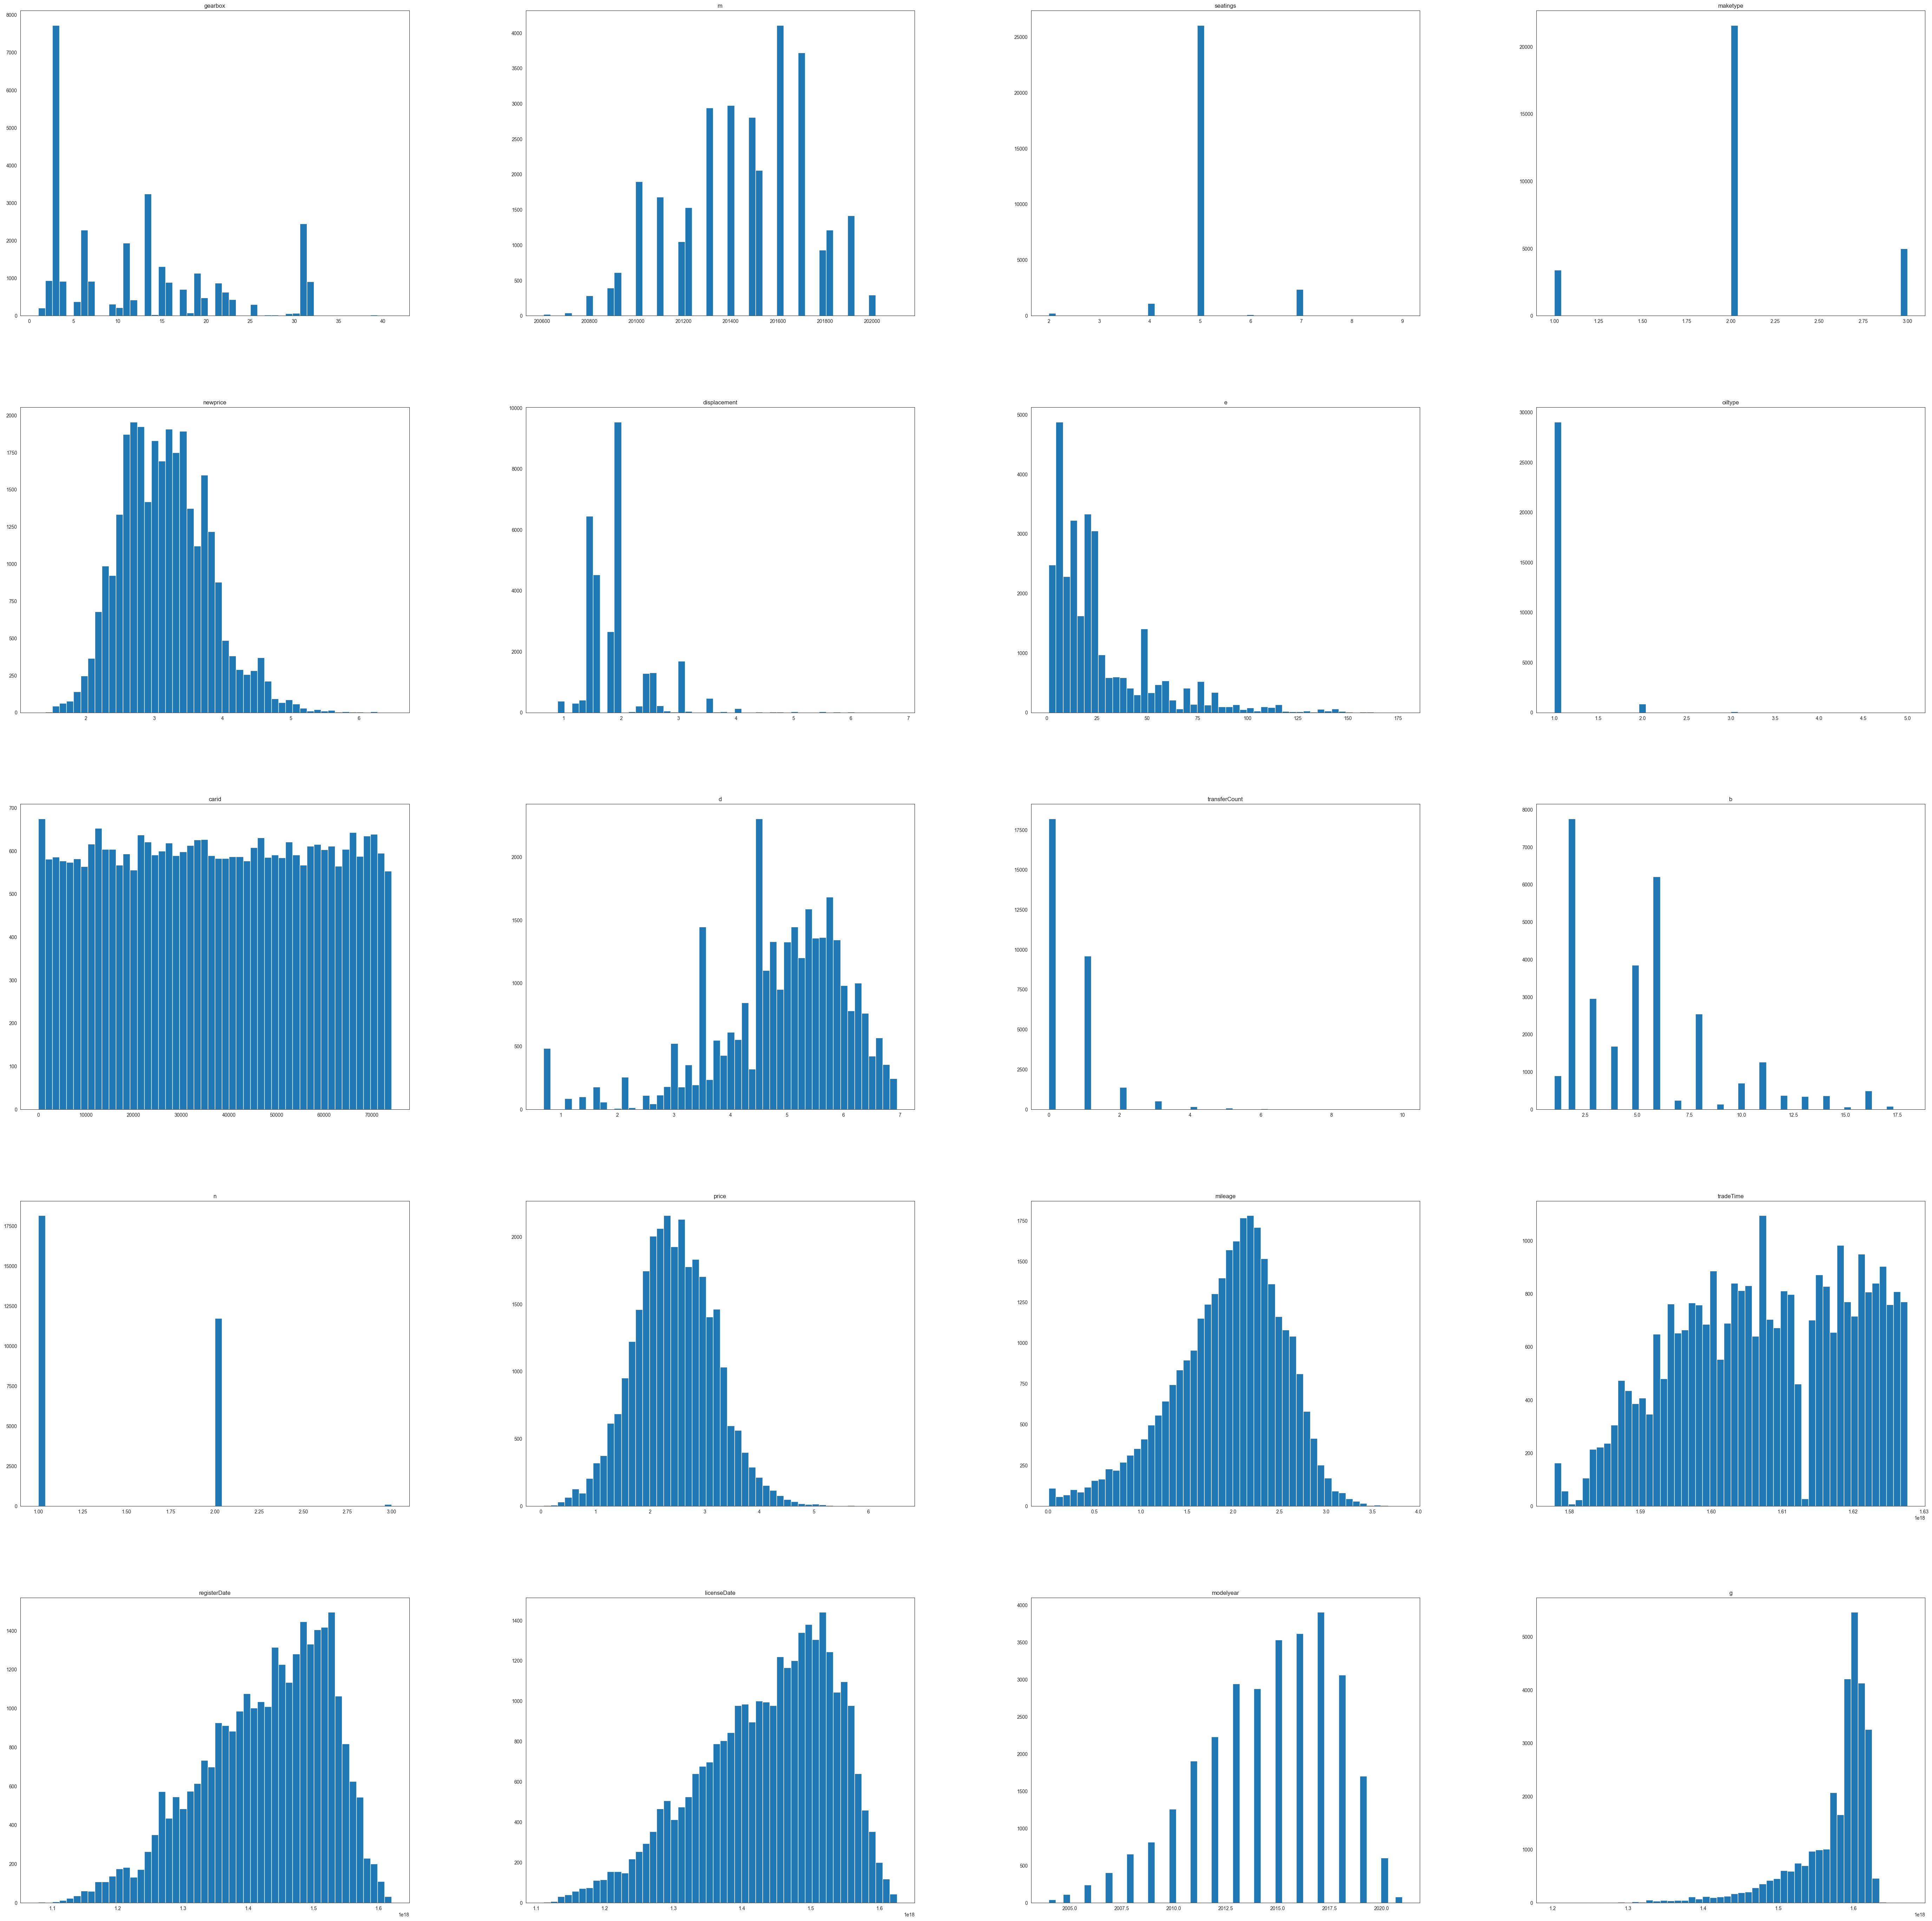

In [86]:
num_bins = int(np.floor(1+(3.3)*(np.log2(len(train_df)))))
_ = train_df.hist(column = numerical_types, grid=False, figsize = (70, 70), bins=num_bins)

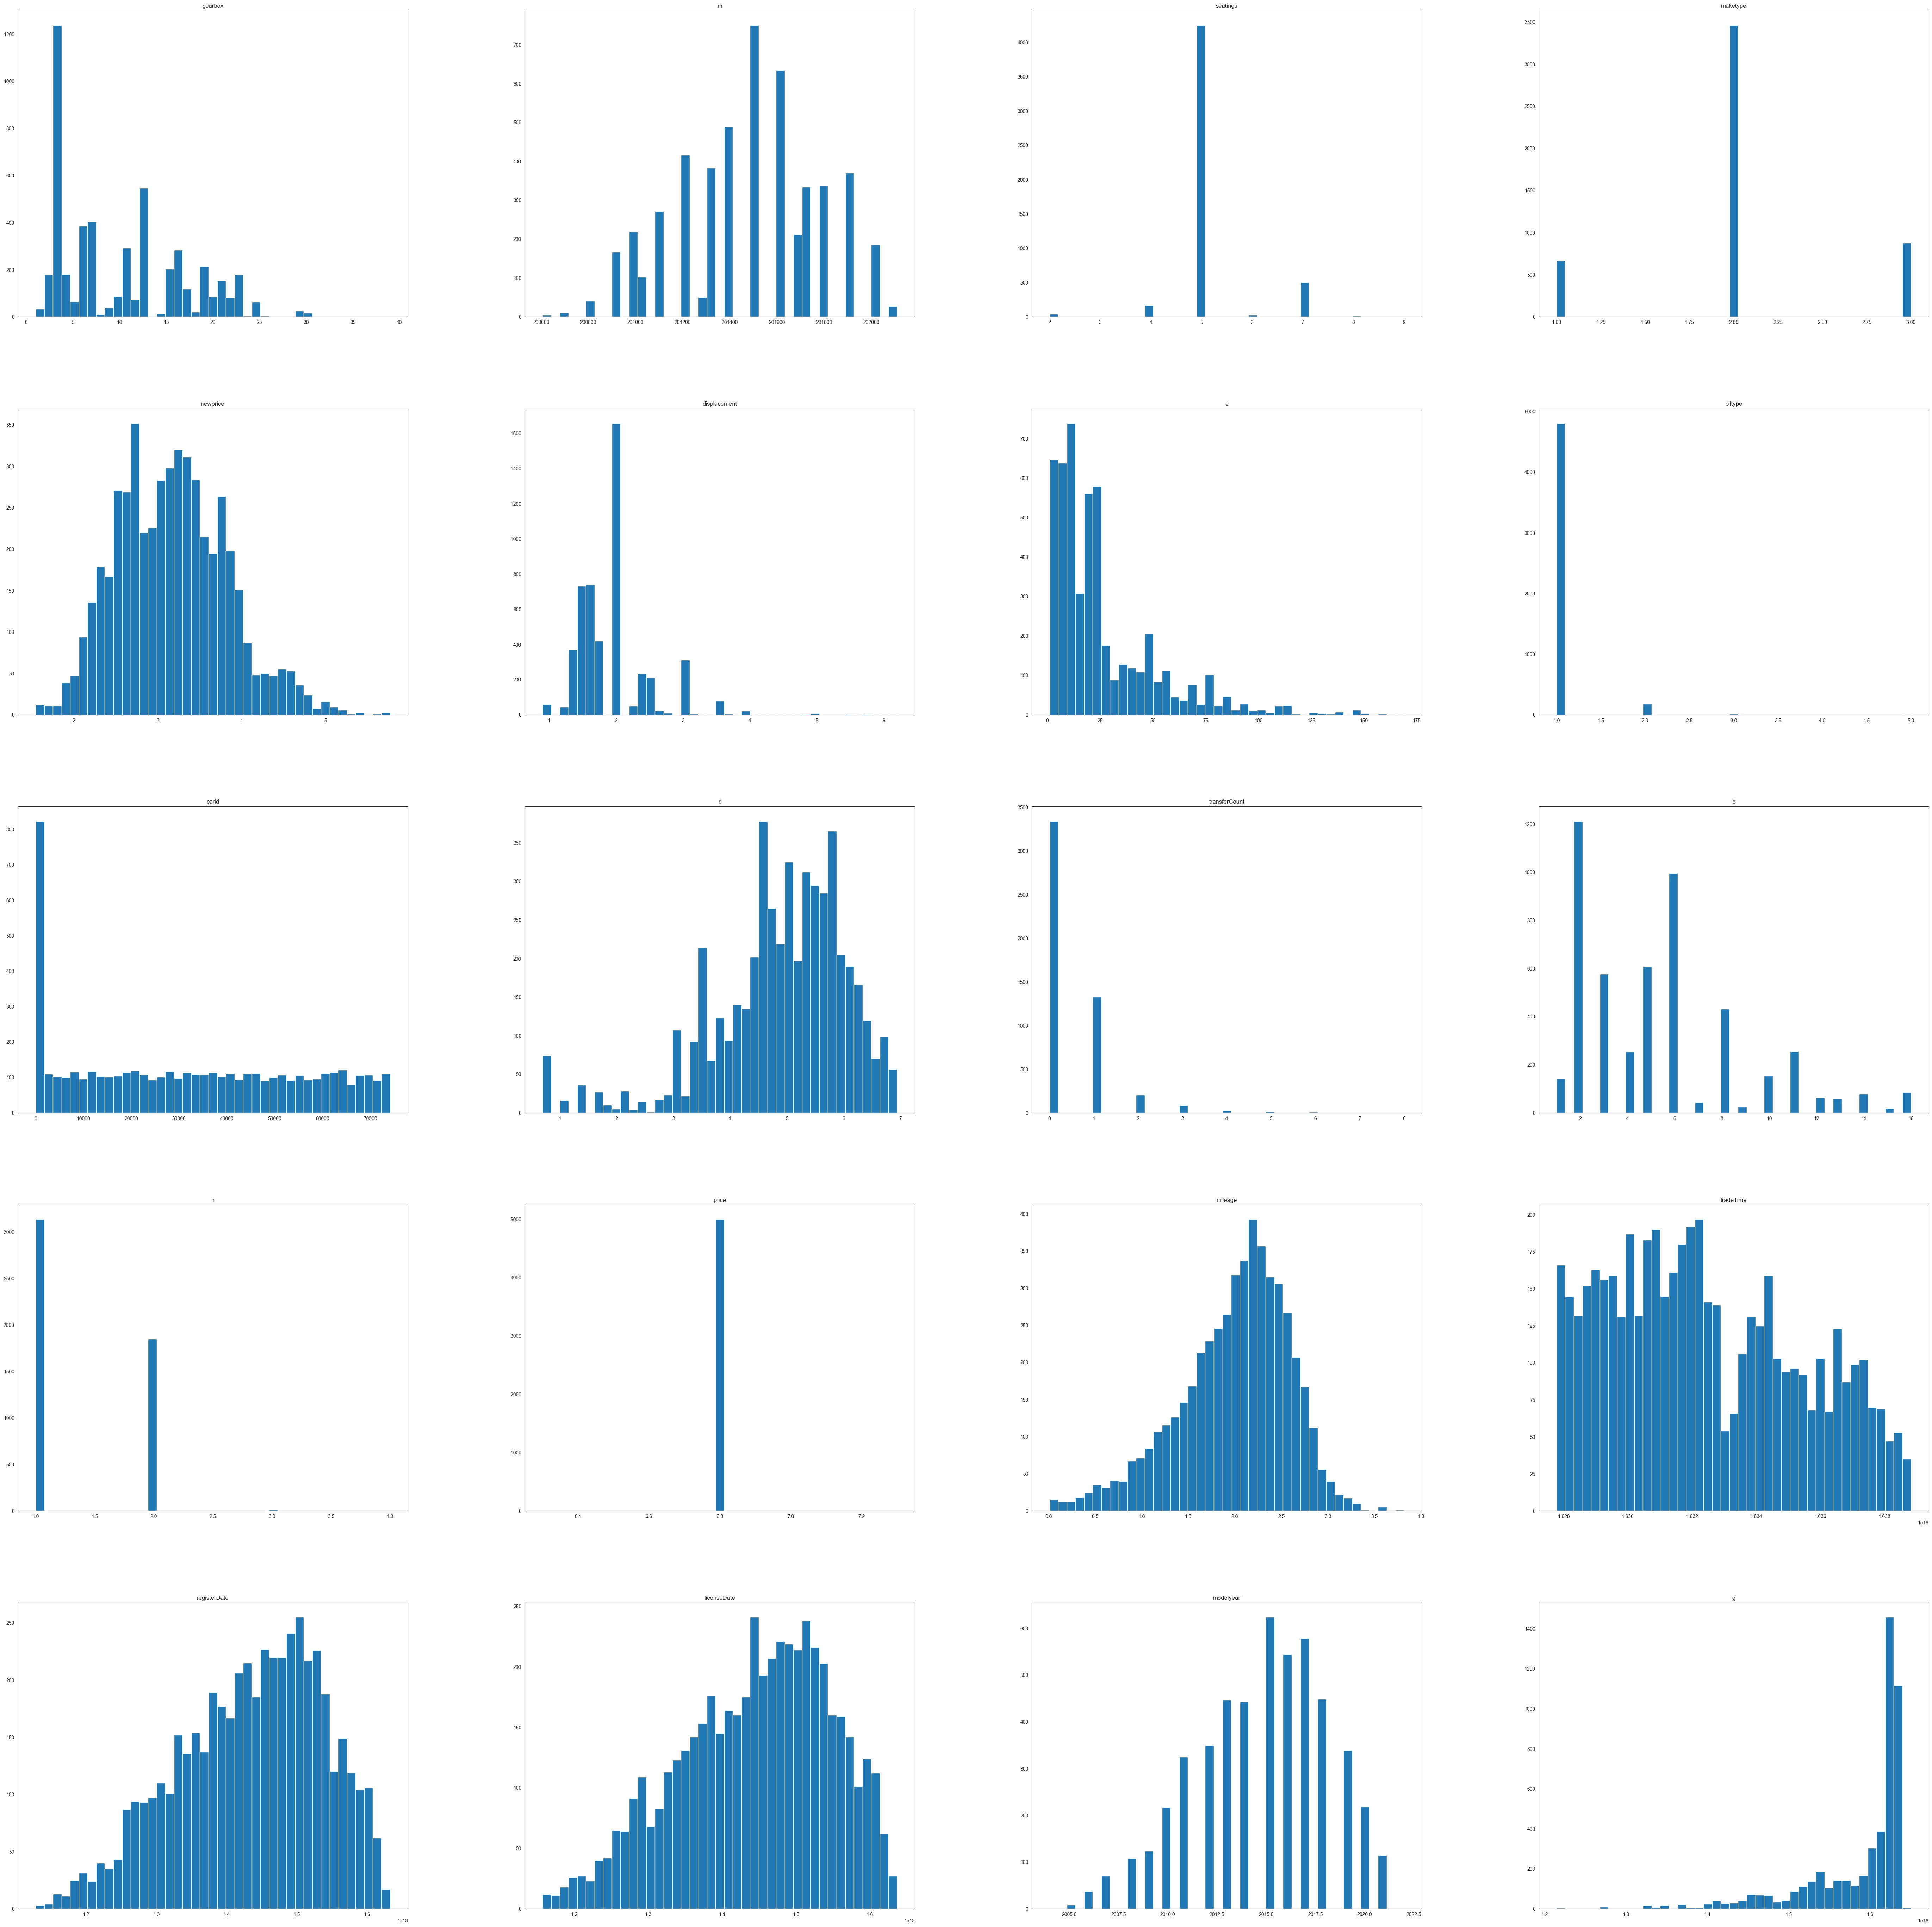

In [87]:
num_bins = int(np.floor(1+(3.3)*(np.log2(len(test_df)))))
_ = test_df.hist(column = numerical_types, grid=False, figsize = (70, 70), bins=num_bins)

In [88]:
feats = list(train_df.columns)
feats.remove('carid')
feats.remove('price')
robsc = RobustScaler()
train_id = train_df['carid'].values
test_id = test_df['carid'].values
train_X = robsc.fit_transform(train_df[feats])
test_X = robsc.transform(test_df[feats])
train_y = train_df['price'].values
test_y = test_df['price'].values
train_df[feats].shape

(29999, 143)

In [89]:
inputTrain = pd.concat([pd.DataFrame(train_id, columns=['carid']), pd.DataFrame(train_X, columns=feats), pd.DataFrame(train_y, columns=['price'])], axis=1)
inputTest = pd.concat([pd.DataFrame(test_id, columns=['carid']), pd.DataFrame(test_X, columns=feats), pd.DataFrame(np.zeros(len(test_df['price'])), columns=['price'])], axis=1)

In [90]:
inputTrain

,carid,tradeTime,mileage,color_1,color_2,color_3,color_4,color_5,color_6,color_7,...,cityId2,cityId3,cityId4,cityId5,cityId6,cityId7,l1,l2,l3,price
0,1,0.840336,-0.534415,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,-1.230769,-1.080000,0.668317,1.656321
1,2,0.827731,0.315772,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.062678,-0.613333,-0.049505,2.125848
2,5,0.802521,1.028558,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.390313,-1.280000,-0.222772,0.693147
3,6,0.844538,-0.089701,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-0.433048,0.173333,1.074257,1.682688
4,7,0.848739,-0.154414,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,-0.960114,-0.506667,0.574257,1.931521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,18531,0.701681,0.538139,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.0,0.0,0.0,0.0,-1.017094,-1.546667,0.396040,0.631272
29995,4294,-0.798319,0.680581,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.877493,0.320000,-0.049505,2.230014
29996,20584,-0.310924,0.478198,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.037037,-1.613333,0.099010,1.791759
29997,11490,-0.130252,0.441610,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.749288,-0.013333,-0.198020,3.367296


In [91]:
inputTest

,carid,tradeTime,mileage,color_1,color_2,color_3,color_4,color_5,color_6,color_7,...,cityId2,cityId3,cityId4,cityId5,cityId6,cityId7,l1,l2,l3,price
0,3,1.218487,0.017225,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.643875,1.386667,1.207921,0.0
1,4,1.037815,0.237196,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,-2.646724,-1.840000,-0.410891,0.0
2,8,1.273109,0.516128,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,-0.675214,-1.960000,-0.371287,0.0
3,9,1.235294,-1.092178,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.008547,0.120000,1.064356,0.0
4,11,1.016807,0.082312,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.800570,0.200000,-0.103960,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,55510,1.352941,0.306204,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.549858,-0.213333,1.014851,0.0
4996,1768,1.075630,0.619421,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.250712,-0.680000,-0.049505,0.0
4997,20723,1.121849,0.609669,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.564103,-0.346667,-0.074257,0.0
4998,15625,1.357143,-0.058507,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-1.572650,-1.080000,0.717822,0.0


In [ ]:
inputTrain.to_csv('inputTrain.csv')
inputTest.to_csv('inputTest.csv')